<a href="https://colab.research.google.com/github/cvillarr123/marketingKPI/blob/main/CLASIFICACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#0.- Librerias 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split

from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
drive.mount('/content/drive')



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



Mounted at /content/drive


In [82]:
!pip uninstall scikit-learn -y
!pip install -U pycaret scikit-learn

import pycaret
print('Using PyCaret Version', pycaret.__version__)
print('Path to PyCaret: ', pycaret.__file__)

Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Successfully uninstalled scikit-learn-0.23.2
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)


Using PyCaret Version 2.3.3
Path to PyCaret:  /usr/local/lib/python3.7/dist-packages/pycaret/__init__.py


In [1]:
!pip install shap


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [4]:
#path='/content/drive/My Drive/PROYECTO DATA SCIENCE/Data/DATA DRIVE.xlsx'
#data = pd.read_excel(path,sheet_name='EDAD Y GENERO')
path='DATA DRIVE.xlsx'
data = pd.read_excel(path,sheet_name='EDAD Y GENERO')

** Funciones para graficar en el dash**

In [5]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
#train es el data frame
#count el conteo
#categorical_cols la lista de variables categoricas
#variable es la etiqueta adicional a poner en el grafico

#esta parte ponerla mas abajo reemplazando con los dataframe nuestros
#f=pd.melt(train,id_vars=['count'],value_vars=categorical_cols)
#g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False)
#g.map(boxplot,'value','count')

In [6]:
#graficar las columnas numericas en solo dolor
#lista de columnas numericas  numerical_cols
#sns.pairplot(train[[*numerical_cols,'count']])

In [7]:
# graficar dos tipos de grafico de barras de las categorias
# pasas la columna de las categorias en eje x
def graficar_categorias_vs_objetivo(data, x_col, y_col, tipo_grafico) :
  import plotly.express as px
  if (len(tipo_grafico) >= 1 and tipo_grafico[0] == 1)  :
    fig2 = px.histogram(data, x=x_col, y=y_col, histfunc='sum', height=300,
                        title='Histograma')
    fig2.show()
  if (len(tipo_grafico) >= 2 and tipo_grafico[0] == 1)  :  
    fig1 = px.bar(data, x=x_col, y=y_col, height=300,
                  title='Grafico barras apiladas - Hover on individual items')
    fig1.show()

In [8]:
def dibujar_box_plot(datos, x_col, y_col, orientacion) :
     sns.boxplot(y= datos[x_col] , x= datos[y_col], orient=orientacion)

# ejemplo 
# dibujar_box_plot(data, 'Costperon-Facebooklead', 'Clasificacion', 'v')     

In [9]:
def graficar_countplot ( datos, x_col, y_col, paleta ) :
  chart = sns.countplot(x=x_col, data=datos, palette=paleta)
  chart.set_xticklabels(chart.get_xticklabels(), fontsize=7)
  chart.set(xlabel=x_col, ylabel=y_col)
  plt.show()

# 0.- Transformacion y limpieza

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             3031 non-null   int64  
 1   Year & month                     3031 non-null   object 
 2   Month                            3031 non-null   int64  
 3   Campaign ID                      3031 non-null   int64  
 4   Campaign name                    3031 non-null   object 
 5   Campaign objective               3031 non-null   object 
 6   Ad set ID                        3031 non-null   int64  
 7   Ad set name                      3031 non-null   object 
 8   Ad ID                            3031 non-null   int64  
 9   Ad name                          3031 non-null   object 
 10  Promoted post type               3031 non-null   object 
 11  Promoted post created date       3031 non-null   int64  
 12  Promoted post descri

Eliminar NA

In [11]:
filter1 = data.Year == 2021  
filter2 = data.Age != 'unknown'
filter3 = data.Gender != 'unknown'
filter4 = data["Campaign objective"] == "LEAD_GENERATION"

##filter3 = df_inicial.Month.isin([4,5,6,7])  
data = data[  filter1 & filter2 & filter3 & filter4 ]
data.head(5)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead
0,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,female,0.00,4,4,1.00,0,0,0.00,NaN
1,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,0.10,69,56,1.23,0,0,1.45,NaN
2,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,0.19,18,18,1.00,0,0,10.56,NaN
3,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32
4,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,0.04,17,13,1.31,0,0,2.35,NaN


In [12]:
data=data.dropna(subset = ["Cost per on-Facebook lead"])
data=data.dropna(subset = ["Promoted post description"])

In [13]:
missing_values_count = data.isnull().sum()
missing_values_count[0:43]

Year                                 0
Year & month                         0
Month                                0
Campaign ID                          0
Campaign name                        0
Campaign objective                   0
Ad set ID                            0
Ad set name                          0
Ad ID                                0
Ad name                              0
Promoted post type                   0
Promoted post created date           0
Promoted post description            0
Promoted post message                0
Promoted post caption                0
Ad set start time                    0
Ad set end time                    472
Ad set targeting                     0
Targeting minimum age                0
Targeting maximum age                0
Age                                  0
Gender                               0
Cost                                 0
Impressions                          0
Reach                                0
Frequency                

Etiquetado Manual 

In [14]:
data =data.dropna(subset=["Cost per on-Facebook lead"])
q1= np.percentile(data["Cost per on-Facebook lead"], 25)  
q2= np.percentile(data["Cost per on-Facebook lead"], 50)
q3= np.percentile(data["Cost per on-Facebook lead"], 75) 

data['Clasificacion'] = "Ninguno"
data['ClasificacionDes'] = 'Ninguno'
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']<= q1)] = 2  #"Mejores"
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']> q1 ) & (data['Cost per on-Facebook lead'] <= q3)] = 1 # "Regulares"
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']> q3 )] = 0 #"Peores"


data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']<= q1)] = "Mejores"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']> q1 ) & (data['Cost per on-Facebook lead'] <= q3)] = "Regulares"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']> q3 )] = "Peores"

data['Clasificacion']= data['Clasificacion'].astype('int')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

**Caracteristicas o variables predictoras calculados**

In [15]:
data['Descripcion'] = data['Promoted post description'] 
data['Message'] = data['Promoted post message'] 
data['Caption'] = data['Promoted post caption'] 
data['NumDescripcion'] = data.Descripcion.str.split().str.len()
data['NumMessage'] = data.Message.str.split().str.len()
data['NumCaption'] = data.Caption.str.split().str.len()

In [16]:
data['Rate'] = data['Unique leads']/data['Reach'] 
data['CTR'] = data['Link clicks']/data['Impressions'] 

In [17]:
data.head(2)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,ClasificacionDes,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR
3,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,2,Mejores,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2,25,6,0.005181,0.013274
13,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,Regulares,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2,48,2,0.001188,0.003038


**Creacion de variables categoricas del campo intereses y nivel educacion**

In [18]:
import warnings
warnings.filterwarnings('ignore')

data['intereses'] = '0' 
#data['education_statuses'] = '0'

data['ComprasOnline'] = '0'
data['Seguridad'] = '0'
data['SeguridadAlarmas'] = '0'
data['DispositivoInteligente'] = '0'
data['DispositivosGPS'] = '0'
data['SmartTechnologies'] = '0'
data['TarjetasCredito'] = '0'
data['Transporte'] = '0'
data['Vehiculos'] = '0'
#data['ServicioTecnico'] ='0'
ComprasOnline = ['Compras online']
Seguridad = ['Seguridad', 'Security', 'Sistema de alarma']
SeguridadAlarmas = ['Anti-theft system', 'Security alarm', 'Sistema de alarma']
DispositivoInteligente = ['Dispositivo inteligente']
DispositivosGPS = ['Dispositivos GPS','GPS Asistido','Conducción','Google Maps','Vehicle tracking system']
SmartTechnologies = ['Smart Technologies']
TarjetasCredito = ['Tarjetas de crédito']
Vehiculos = ['Sector automotor','Vehículos','Automóviles','Carros','Chevrolet','Dispositivos GPS','Honda','Mantenimiento preventivo','Motocicletas','Seguridad vial','Tarjetas de crédito','Toyota','Volkswagen']
Transporte = ['Transporte']
#ServicioTecnico = ['Servicios técnicos y de TI']
#education_statuses = ['10']

for i in data.index:

  #if (i == 3):
    campo_json = json.loads(data.loc[i]['Ad set targeting'])
    #print(campo_json)
    #hay registros que no tienen en el json el flexible_spec
    try:
        lista_intereses = pd.get_dummies(pd.json_normalize( campo_json ,record_path=['flexible_spec','interests'],errors='ignore').rename(columns={'name': 'interes'})['interes']).columns.values.tolist()
        #lista_educacion = pd.json_normalize(cuack_json,record_path=['flexible_spec'],errors='ignore')['education_statuses'][0]
        cadena_interes = '| ' + ''.join([  str( item + ' | ') for item in lista_intereses ])
        #print(cadena_interes)
        #cadena_educacion = '| ' + ''.join([  str( str(item) + ' | ') for item in lista_educacion ])
        data['intereses'][data.index == i] = cadena_interes

        if any(x in cadena_interes  for x in ComprasOnline) :
             data['ComprasOnline'][data.index == i] = '1'
        else :
             data['ComprasOnline'][data.index == i] = '0'

        if any(x in cadena_interes for x in Seguridad ) :
             data['Seguridad'][data.index == i] = '1'
        else :
             data['Seguridad'][data.index == i] = '0'

        if any(x in cadena_interes  for x in SeguridadAlarmas) :
             data['SeguridadAlarmas'][data.index == i] = '1'
        else :
             data['SeguridadAlarmas'][data.index == i] = '0'

        if any(x in cadena_interes  for x in DispositivoInteligente ) :
             data['DispositivoInteligente'][data.index == i] = '1'
        else :
             data['DispositivoInteligente'][data.index == i] = '0'

        if any(x in cadena_interes  for x in DispositivosGPS ) :
             data['DispositivosGPS'][data.index == i] = '1'
        else :
             data['DispositivosGPS'][data.index == i] = '0'

        if any(x in cadena_interes  for x in SmartTechnologies ) :
             data['SmartTechnologies'][data.index == i] = '1'
        else :
             data['SmartTechnologies'][data.index == i] = '0'

        if any(x in cadena_interes  for x in TarjetasCredito ) :
             data['TarjetasCredito'][data.index == i] = '1'
        else :
             data['TarjetasCredito'][data.index == i] = '0'

        if any(x in cadena_interes  for x in Transporte ) :
             data['Transporte'][data.index == i] = '1'
        else :
             data['Transporte'][data.index == i] = '0'

        if any(x in cadena_interes  for x in Vehiculos ) :
             data['Vehiculos'][data.index == i] = '1'
        else :
             data['Vehiculos'][data.index == i] = '0'


        #if any(x in education_statuses for x in cadena_educacion) :
        #     data['education_statuses'][data.index == i] = '1'
        #else :
        #     data['education_statuses'][data.index == i] = '0'


    except:
        #print('no entra')
        data.loc[i]['intereses'] = '0' 
        #data.loc[i]['education_statuses'] = '0' 
        data.loc[i]['ComprasOnline'] = '0'
        data.loc[i]['Seguridad'] = '0'
        data.loc[i]['SeguridadAlarmas'] = '0'
        data.loc[i]['DispositivoInteligente'] = '0'
        data.loc[i]['DispositivosGPS'] = '0'
        data.loc[i]['SmartTechnologies'] = '0'
        data.loc[i]['TarjetasCredito'] = '0'
        data.loc[i]['Vehiculos'] = '0'
        data.loc[i]['Transporte'] = '0'
        


In [19]:
#Transformar a enteros
#data['education_statuses'] = data['education_statuses'].astype('int')
data['ComprasOnline'] = data['ComprasOnline'].astype('int')
data['Seguridad'] = data['Seguridad'].astype('int')
data['SeguridadAlarmas'] = data['SeguridadAlarmas'].astype('int')
data['DispositivoInteligente'] = data['DispositivoInteligente'].astype('int')
data['DispositivosGPS'] = data['DispositivosGPS'].astype('int')
data['SmartTechnologies'] = data['SmartTechnologies'].astype('int')
data['TarjetasCredito'] = data['TarjetasCredito'].astype('int')
data['Vehiculos'] = data['Vehiculos'].astype('int')
data['Transporte'] = data['Transporte'].astype('int')


In [20]:
np.unique (data['DispositivosGPS'])

array([0, 1])

In [21]:
data.head(2)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,ClasificacionDes,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR,intereses,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos
3,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,2,Mejores,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2,25,6,0.005181,0.013274,| Anti-theft system | Compras online | Conducc...,1,1,1,1,1,1,1,1,1
13,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,Regulares,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2,48,2,0.001188,0.003038,| Anti-theft system | Compras online | Conducc...,1,1,1,1,1,1,1,1,1


**Creacion de variables TF y IDF**

https://www.kaggle.com/vbmokin/nlp-eda-bag-of-words-tf-idf-glove-bert

https://sci2lab.github.io/ml_tutorial/tfidf/


In [22]:
!pip install keras

In [23]:

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
#from keras.optimizers import Adam
import torch

import warnings
warnings.simplefilter('ignore')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
    
data['length'] = data['Promoted post message'].apply(length)

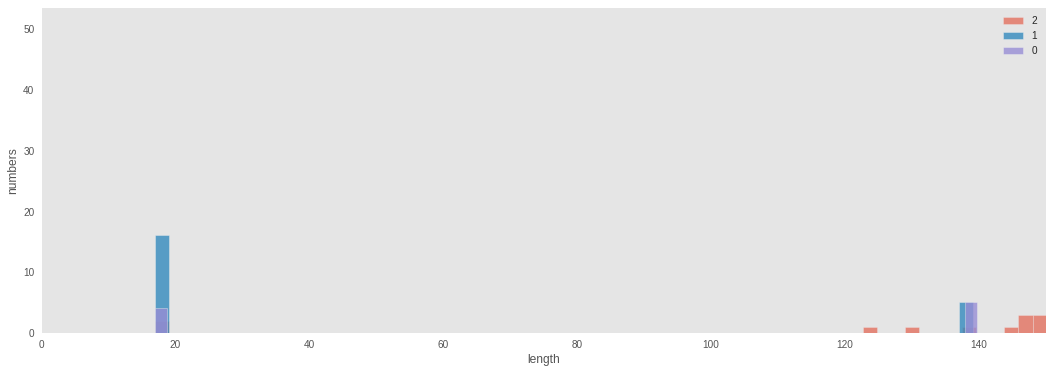

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(data[data['Clasificacion'] == 2]['length'], alpha = 0.6, bins=bins, label='2')
plt.hist(data[data['Clasificacion'] == 1]['length'], alpha = 0.8, bins=bins, label='1')
plt.hist(data[data['Clasificacion'] == 0]['length'], alpha = 0.8, bins=bins, label='0')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

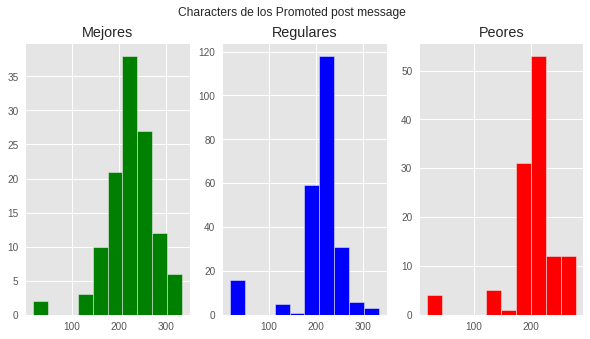

In [ ]:
fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(10,5))

data_len=data[data['Clasificacion']==2]['Promoted post message'].str.len()
ax0.hist(data_len,color='green')
ax0.set_title('Mejores')

data_len=data[data['Clasificacion']==1]['Promoted post message'].str.len()
ax1.hist(data_len,color='blue')
ax1.set_title('Regulares')

data_len=data[data['Clasificacion']==0]['Promoted post message'].str.len()
ax2.hist(data_len,color='red')
ax2.set_title('Peores')


fig.suptitle('Characters de los Promoted post message  ')
plt.show()

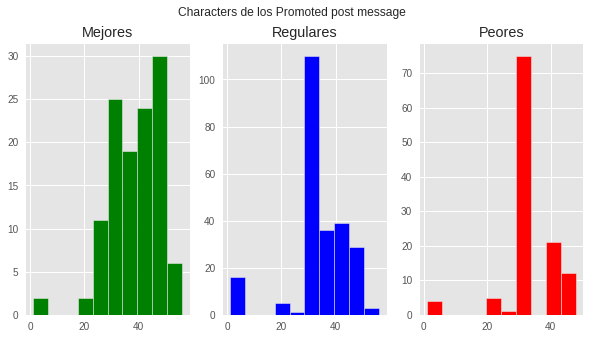

In [ ]:

fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(10,5))

data_len=data[data['Clasificacion']==2]['Promoted post message'].str.split().map(lambda x: len(x))
ax0.hist(data_len,color='green')
ax0.set_title('Mejores')

data_len=data[data['Clasificacion']==1]['Promoted post message'].str.split().map(lambda x: len(x))
ax1.hist(data_len,color='blue')
ax1.set_title('Regulares')

data_len=data[data['Clasificacion']==0]['Promoted post message'].str.split().map(lambda x: len(x))
ax2.hist(data_len,color='red')
ax2.set_title('Peores')


fig.suptitle('Characters de los Promoted post message  ')
plt.show()

In [ ]:
def create_corpus(Clasificacion):
    corpus=[]
    
    for x in data[data['Clasificacion']==Clasificacion]['Promoted post message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
def create_corpus_df(data, Clasificacion):
    corpus=[]
    
    for x in data[data['Clasificacion']==Clasificacion]['Promoted post message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

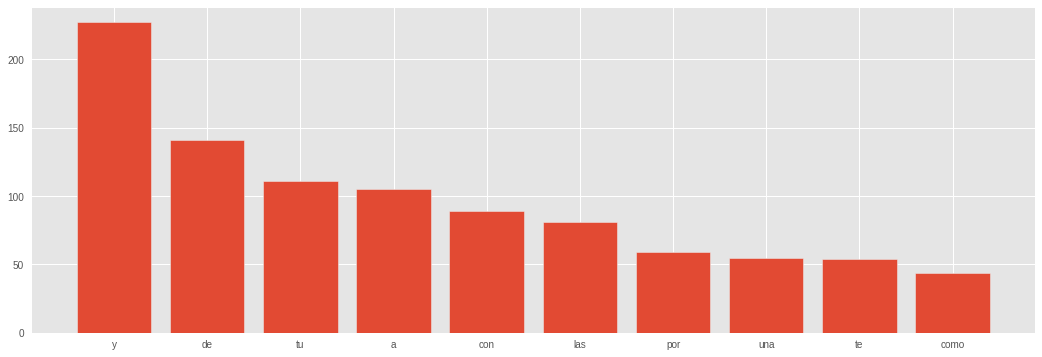

In [ ]:
# stopwords comunes en los message de las publicaciones 

corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

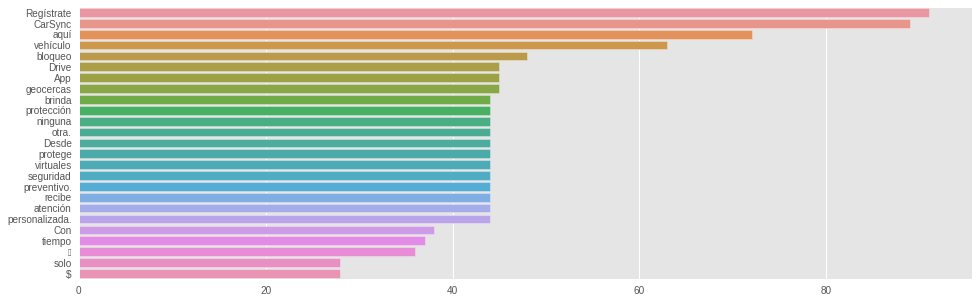

In [ ]:
plt.figure(figsize=(16,5))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        sns.barplot(x=y,y=x)

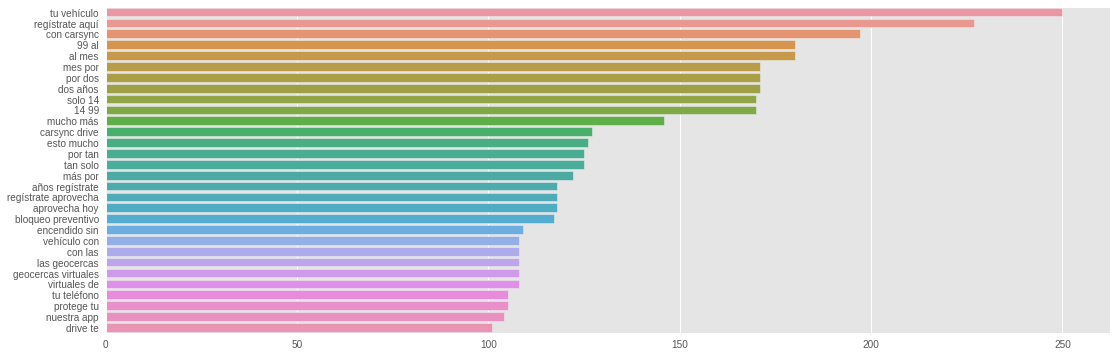

In [ ]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

    plt.figure(figsize=(16,5))


top_tweet_bigrams=get_top_tweet_bigrams(data['Promoted post message'])[:30]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

5. Data Cleaning 


In [ ]:
# Eliminar emoji

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(message):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', message)

remove_emoji("Omg another Earthquake 😔😔")

data['message_transformada']=data['Promoted post message'].apply(lambda x: remove_emoji(x))


In [ ]:
#Eliminar  punctuation
def remove_punct(message):
    table=str.maketrans('','',string.punctuation)
    return message.translate(table)

data['message_transformada']=data['message_transformada'].apply(lambda x : remove_punct(x))

In [ ]:
data['message_transformada']

3       Seguridad es poder recibir asistencia vial en ...
13      ¡No permitas que esto te pase Por tan solo  14...
15      ¡No permitas que esto te pase Por tan solo  14...
16      ¡No permitas que esto te pase Por tan solo  14...
18      ¡No permitas que esto te pase Por tan solo  14...
                              ...                        
2962    CarSync Drive te brinda una protección como ni...
2965    CarSync Drive te brinda una protección como ni...
2968    CarSync Drive te brinda una protección como ni...
3019    Ecuatoriano  que se respeta no se deja ganar p...
3023    Ecuatoriano  que se respeta no se deja ganar p...
Name: message_transformada, Length: 476, dtype: object

In [ ]:
corpus_new1=create_corpus_df(data,51)
len(corpus_new1)

0

In [ ]:
# WordCloud

TF IDF

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

In [ ]:
X_train_tfidf, tfidf_vectorizer = tfidf(data)


In [ ]:
tfidf(data)

(<52x58 sparse matrix of type '<class 'numpy.float64'>'
 	with 95 stored elements in Compressed Sparse Row format>,
 TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.float64'>, encoding='utf-8',
                 input='content', lowercase=True, max_df=1.0, max_features=None,
                 min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                 smooth_idf=True, stop_words=None, strip_accents=None,
                 sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, use_idf=True, vocabulary=None))

In [ ]:
tfidf_vectorizer 

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
X_train_tfidf

<52x58 sparse matrix of type '<class 'numpy.float64'>'
	with 95 stored elements in Compressed Sparse Row format>

# 1.-  AEDA

In [24]:
data.dtypes

Year                                 int64
Year & month                        object
Month                                int64
Campaign ID                          int64
Campaign name                       object
Campaign objective                  object
Ad set ID                            int64
Ad set name                         object
Ad ID                                int64
Ad name                             object
Promoted post type                  object
Promoted post created date           int64
Promoted post description           object
Promoted post message               object
Promoted post caption               object
Ad set start time                    int64
Ad set end time                    float64
Ad set targeting                    object
Targeting minimum age                int64
Targeting maximum age                int64
Age                                 object
Gender                              object
Cost                               float64
Impressions

In [25]:
data.describe()

,Year,Month,Campaign ID,Ad set ID,Ad ID,Promoted post created date,Ad set start time,Ad set end time,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos
count,476.0,476.000000,4.760000e+02,4.760000e+02,4.760000e+02,476.000000,476.000000,4.0,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,2021.0,4.193277,2.384593e+16,2.384635e+16,2.384679e+16,44334.901261,44175.512605,44364.0,22.432773,56.138655,14.374370,7330.718487,4224.294118,1.541786,41.088235,5.735294,2.322668,2.383256,1.002101,6.792017,34.491597,5.676471,0.004501,0.009135,0.808824,0.497899,0.428571,0.401261,0.525210,0.401261,0.888655,0.401261,0.915966
std,0.0,2.025219,1.680774e+11,7.915021e+11,6.676882e+11,33.310228,103.190605,0.0,1.454466,9.925072,25.172324,13626.452709,7092.997162,0.432234,67.071655,9.044294,1.575707,1.769113,0.706359,3.097167,10.284067,2.326134,0.018485,0.015230,0.393641,0.500522,0.495392,0.490669,0.499889,0.490669,0.314889,0.490669,0.277730
min,2021.0,1.000000,2.384591e+16,2.384591e+16,2.384591e+16,44272.000000,44118.000000,44364.0,18.000000,44.000000,0.020000,4.000000,3.000000,1.000000,1.000000,1.000000,0.750000,0.020000,0.000000,1.000000,1.000000,1.000000,0.000232,0.001137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,2.000000,2.384591e+16,2.384591e+16,2.384615e+16,44327.000000,44118.000000,44364.0,21.000000,44.000000,1.867500,807.750000,568.000000,1.230000,5.000000,1.000000,1.530000,1.277500,1.000000,5.000000,30.000000,4.000000,0.000947,0.004347,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2021.0,4.000000,2.384591e+16,2.384591e+16,2.384664e+16,44327.000000,44118.000000,44364.0,23.000000,65.000000,4.920000,2607.500000,1696.500000,1.440000,15.000000,2.000000,1.955000,2.025000,1.000000,7.000000,31.000000,6.000000,0.001529,0.005932,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2021.0,6.000000,2.384591e+16,2.384603e+16,2.384748e+16,44362.000000,44138.000000,44364.0,23.000000,65.000000,15.382500,8261.750000,5047.500000,1.712500,44.000000,6.000000,2.732500,3.100000,1.250000,7.000000,40.000000,7.000000,0.003013,0.009790,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2021.0,7.000000,2.384775e+16,2.384805e+16,2.384808e+16,44399.000000,44396.000000,44364.0,25.000000,65.000000,214.980000,147944.000000,67398.000000,3.900000,516.000000,68.000000,27.500000,11.390000,2.000000,12.000000,56.000000,9.000000,0.333333,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


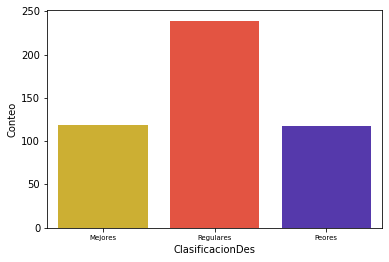

In [26]:
#sns.countplot(x="Clasificacion", data=data, palette="bwr")
#plt.show()

graficar_countplot(data,'ClasificacionDes','Conteo','CMRmap_r')

In [27]:
pd.unique(data['Promoted post type'])

array(['link'], dtype=object)

In [28]:
all_features = ['Targeting minimum age', 'Targeting maximum age', 'Age', 'Gender','Cost', 'Impressions', 'Reach', 'Link clicks', 'Unique leads','CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead','NumDescripcion', 'NumMessage', 'NumCaption', 'Rate','CTR', 'education_statuses', 'ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte']
categorical_columns_txt = ['Age', 'Gender']
categorical_columns_int = ['ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte','Vehiculos']
categorical_columns = ['Age', 'Gender', 'ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte','Vehiculos']
numerical_columns = ['Targeting minimum age', 'Targeting maximum age','NumDescripcion', 'NumMessage', 'NumCaption', 'Rate','CTR']
features_columns =  ['Targeting minimum age', 'Targeting maximum age','NumDescripcion', 'NumMessage', 'NumCaption', 'Rate','CTR','Age', 'Gender','education_statuses', 'ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte']
labels = ['Clasificacion']

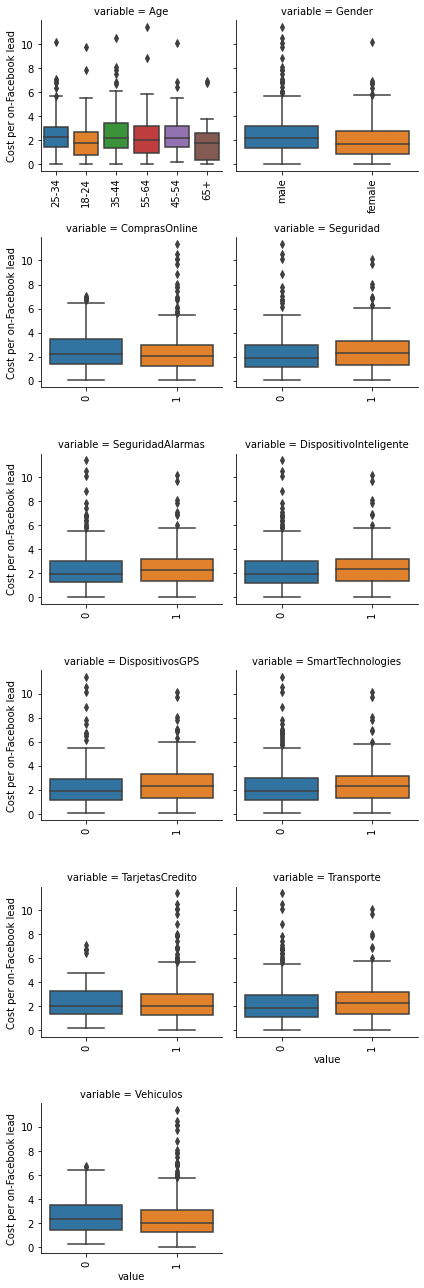

In [29]:
f=pd.melt (data,id_vars=['Cost per on-Facebook lead'],value_vars=categorical_columns)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False)
g.map(boxplot,'value','Cost per on-Facebook lead')

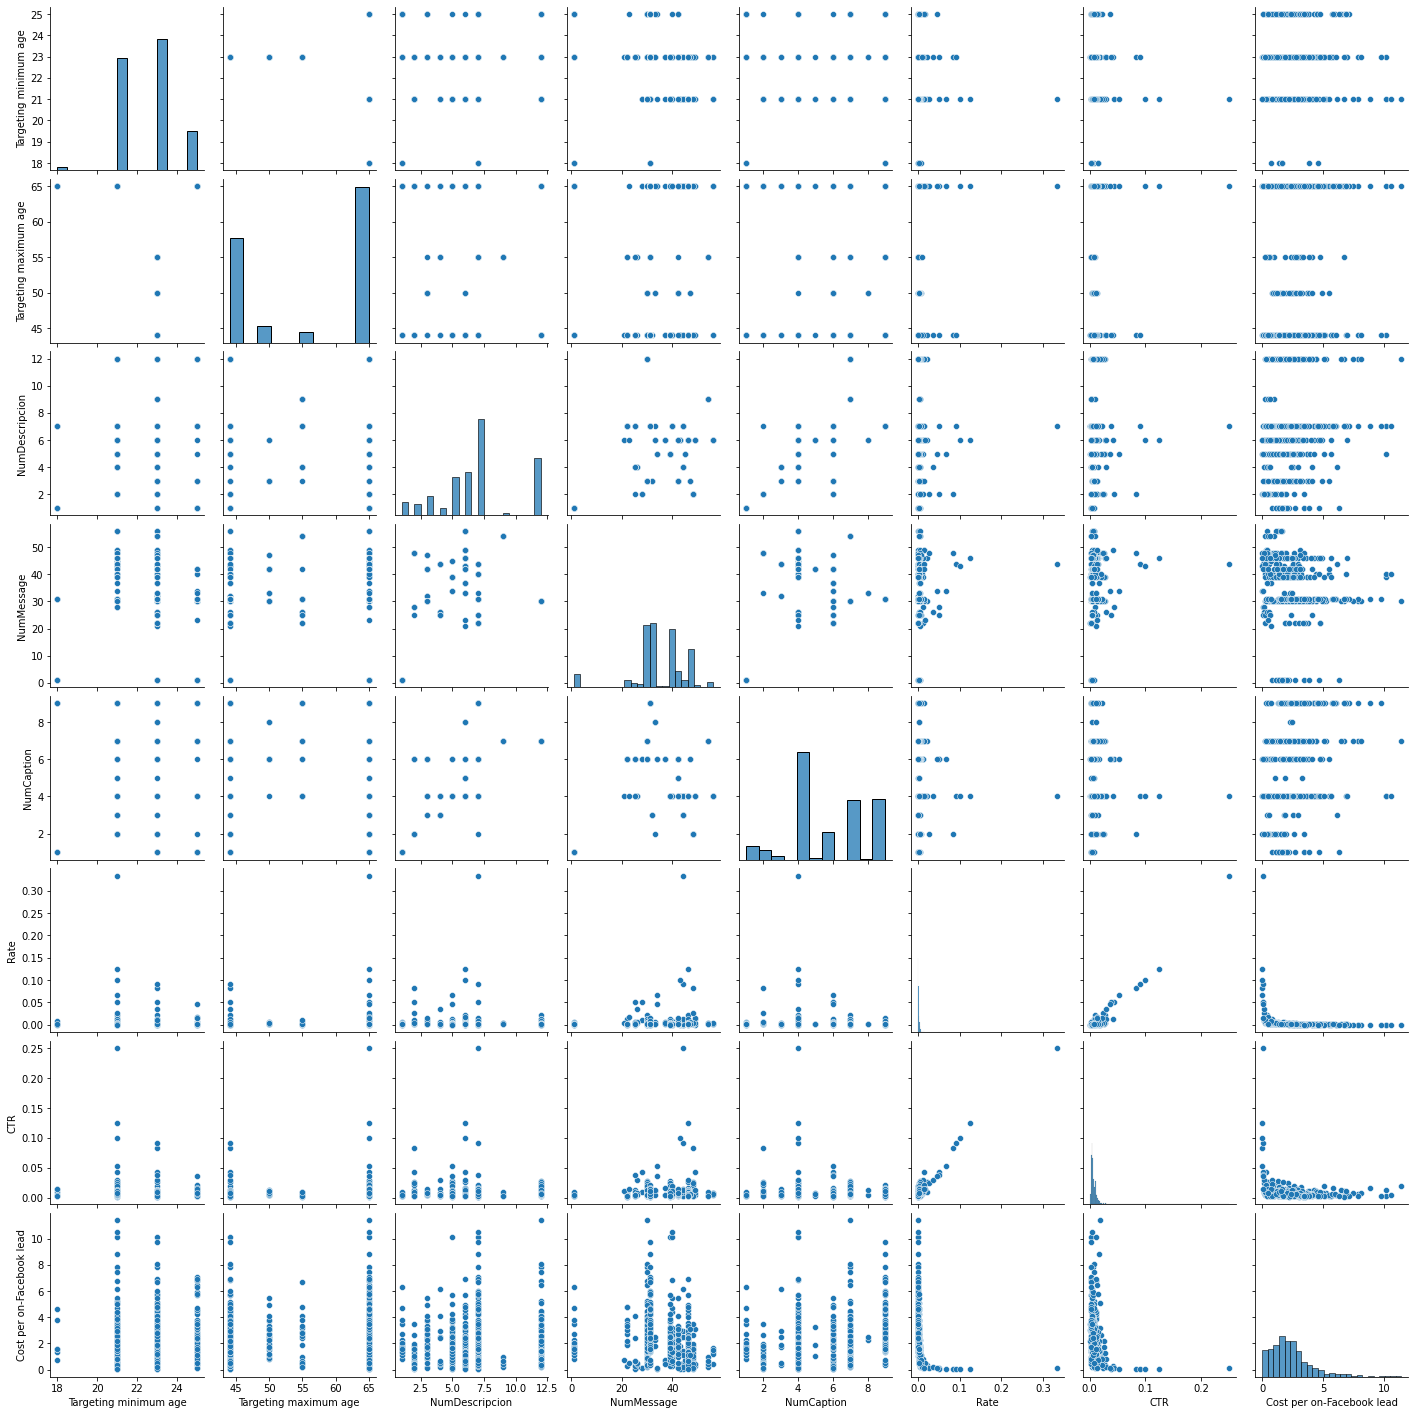

In [30]:
sns.pairplot(data[[*numerical_columns,'Cost per on-Facebook lead']])

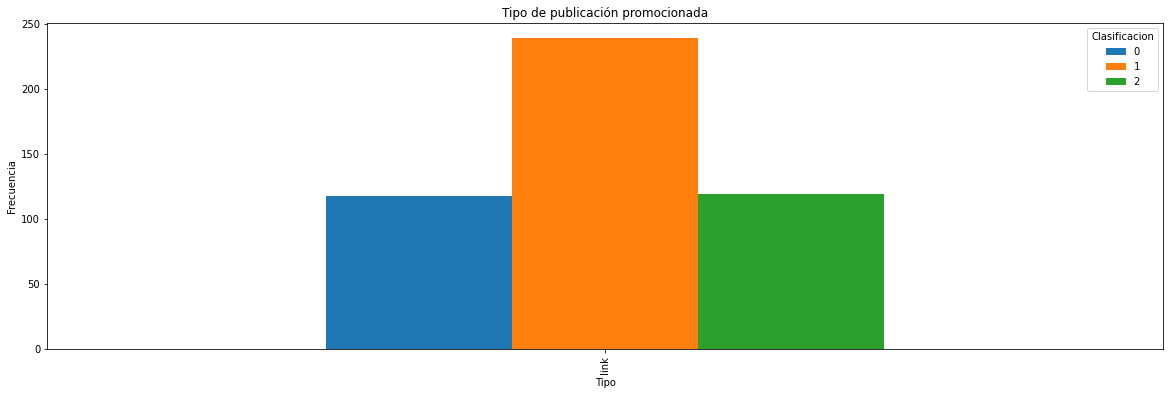

In [31]:
pd.crosstab(data["Promoted post type"],data["Clasificacion"]).plot(kind="bar",figsize=(20,6))
plt.title('Tipo de publicación promocionada')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

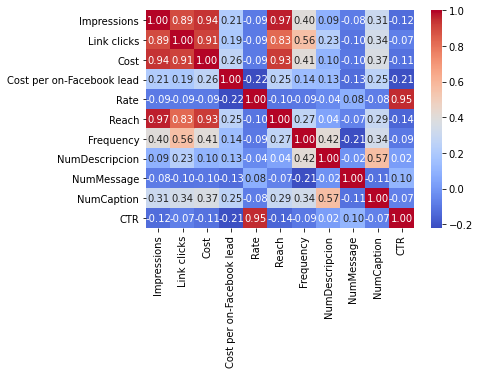

In [32]:
numerical_columns = ["Impressions","Link clicks","Cost","Cost per on-Facebook lead","Rate","Reach","Frequency","NumDescripcion","NumMessage","NumCaption","CTR"]
g=sns.heatmap(data[numerical_columns].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

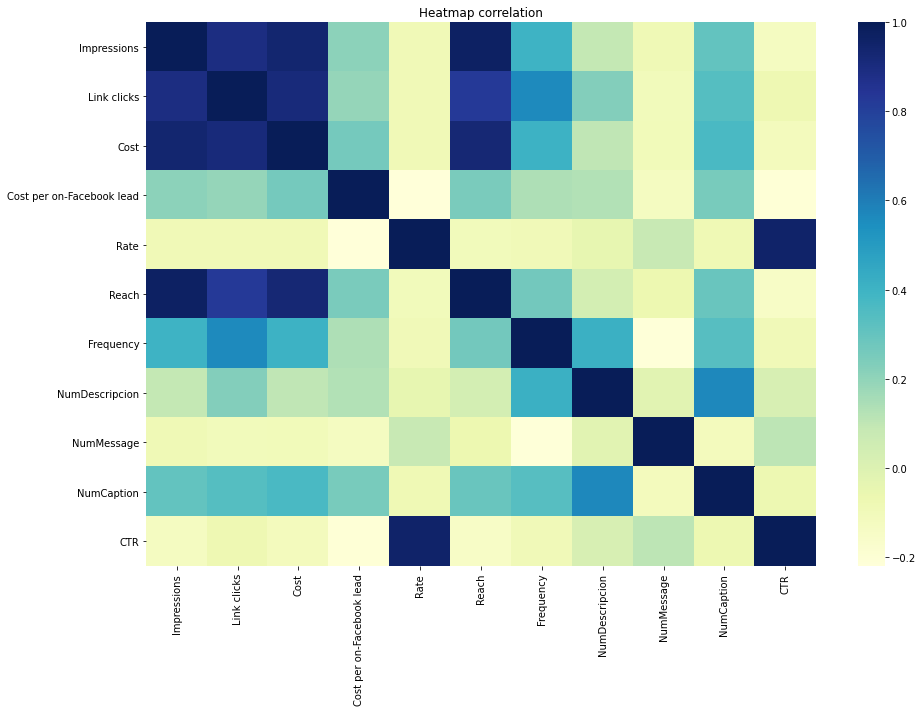

In [33]:
import seaborn

df_corr = data[numerical_columns].corr() # Calculation of the correlation coefficients in pairs, with the default method:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") 
seaborn.set(font_scale=1,style='white')

plt.title('Heatmap correlation')
plt.show()

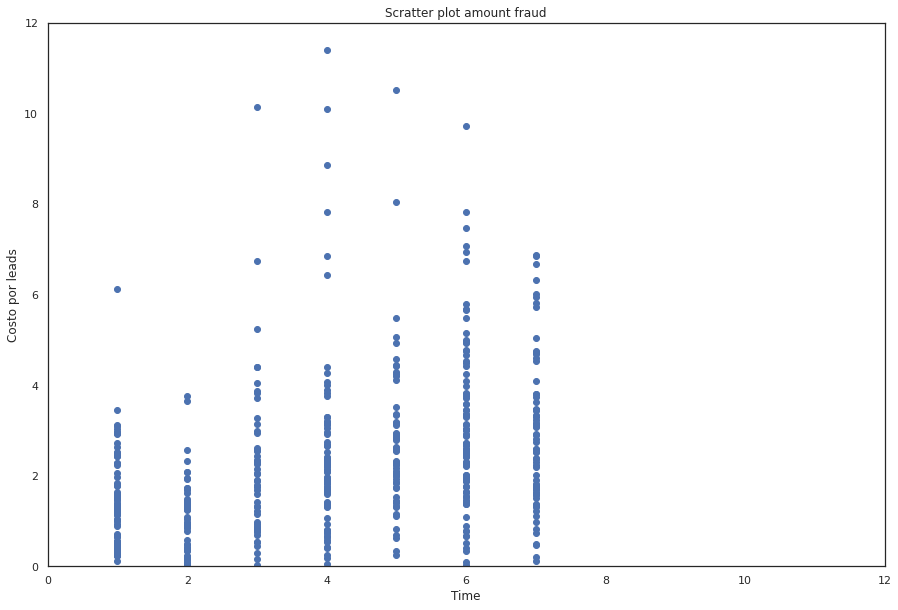

In [34]:
plt.figure(figsize=(15,10))
plt.scatter(data['Month'], data['Cost per on-Facebook lead']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Costo por leads')
plt.xlim([0,12])
plt.ylim([0,12])
plt.show()

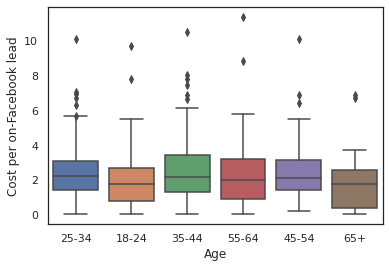

In [35]:
dibujar_box_plot(data, 'Cost per on-Facebook lead', 'Age', 'v')

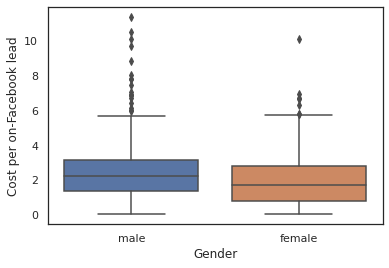

In [36]:
dibujar_box_plot(data, 'Cost per on-Facebook lead', 'Gender', 'v')

# 2.- Seleccion de variables, data entrenamiento y test


In [37]:
data.columns

Index(['Year', 'Year & month', 'Month', 'Campaign ID', 'Campaign name',
       'Campaign objective', 'Ad set ID', 'Ad set name', 'Ad ID', 'Ad name',
       'Promoted post type', 'Promoted post created date',
       'Promoted post description', 'Promoted post message',
       'Promoted post caption', 'Ad set start time', 'Ad set end time',
       'Ad set targeting', 'Targeting minimum age', 'Targeting maximum age',
       'Age', 'Gender', 'Cost', 'Impressions', 'Reach', 'Frequency',
       'Link clicks', 'Unique leads', 'CPM (cost per 1000 impressions)',
       'Cost per on-Facebook lead', 'Clasificacion', 'ClasificacionDes',
       'Descripcion', 'Message', 'Caption', 'NumDescripcion', 'NumMessage',
       'NumCaption', 'Rate', 'CTR', 'intereses', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos'],
      dtype='object')

# Preprocesamiento y split de train - test

In [38]:
data['intereses'].unique()

array(['| Anti-theft system | Compras online | Conducción | Dispositivo inteligente | Dispositivos GPS | GPS Asistido | Google Maps | Security | Security alarm | Seguridad | Sistema de alarma | Smart Technologies | Tarjetas de crédito | Transporte | Vehicle tracking system | ',
       '| Business class | Compras online | Pequeñas empresas | Pequeñas y medianas empresas | Sector automotor | Tarjetas de crédito | Vehículos | Vehículos de lujo | Vehículos todoterreno | ',
       '| Anti-theft system | Carreras de motocicletas | Club de moteros | Dispositivos GPS | Google Maps | Harley-Davidson | Honda | Kawasaki motorcycles | Motero | Motocicleta crucero | Motocicleta custom | Motocicleta deportiva | Motocicletas | Motociclismo | Motorcycle accessories | Security alarm | Sistema de alarma | Suzuki | Unidad de seguimiento GPS | Vehicle tracking system | Waze | Yamaha Motor Company | ',
       '0',
       '| Anti-theft system | Dispositivos GPS | Rastreo Vehicular Automatizado | Unidad de s

In [39]:
data.sample(2)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,ClasificacionDes,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR,intereses,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos
2645,2021,2021|07,7,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23847680209940753,Intereses_Seguridad_GPS_3provincias,23847828846920753,anuncio_no_estas_en_nada_junio_18,link,44384,{{product.description}},{{product.brand}},{{product.name}},44350,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,35-44,female,2.64,658,560,1.18,3,2,4.01,1.32,1,Regulares,{{product.description}},{{product.brand}},{{product.name}},1,1,1,0.003571,0.004559,| Automóviles | Carros | Chevrolet | Dispositi...,0,1,0,0,1,0,1,0,1
1031,2021,2021|03,3,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823950753,intereses_drive - amplio - 3 ciudades,23846149195990753,anuncio_promo_black_friday_3,link,44327,Dispositivo GPS e instalación GRATIS,Con CarSync impide que tu vehículo sea encendi...,Precio por tiempo limitado,44118,NaN,"{""age_max"":65,""age_min"":21,""excluded_custom_au...",21,65,25-34,female,3.76,1574,1296,1.21,10,2,2.39,1.88,1,Regulares,Dispositivo GPS e instalación GRATIS,Con CarSync impide que tu vehículo sea encendi...,Precio por tiempo limitado,5,39,4,0.001543,0.006353,| Business class | Compras online | Pequeñas e...,1,0,0,0,0,0,1,0,1


In [40]:
data_original = data.copy()


In [41]:

df= data.drop(['Year', 'Year & month', 'Campaign ID', 'Campaign name',
       'Campaign objective', 'Ad set ID', 'Ad set name', 'Ad ID', 'Ad name',
       'Promoted post type','Promoted post description', 'Promoted post message',
       'Promoted post caption', 'Ad set start time', 'Ad set end time',
       'Ad set targeting', 'Frequency', 'ClasificacionDes',
       'Descripcion', 'Message', 'Caption','Promoted post created date','intereses'], axis=1)


In [42]:
df.columns

Index(['Month', 'Targeting minimum age', 'Targeting maximum age', 'Age',
       'Gender', 'Cost', 'Impressions', 'Reach', 'Link clicks', 'Unique leads',
       'CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead',
       'Clasificacion', 'NumDescripcion', 'NumMessage', 'NumCaption', 'Rate',
       'CTR', 'ComprasOnline', 'Seguridad', 'SeguridadAlarmas',
       'DispositivoInteligente', 'DispositivosGPS', 'SmartTechnologies',
       'TarjetasCredito', 'Transporte', 'Vehiculos'],
      dtype='object')

In [43]:
#df= data[["Month", "NumDescripcion","NumMessage","NumCaption","Targeting minimum age","Targeting maximum age","Age","Gender","Cost","Impressions","Reach","Link clicks","Unique leads","Cost per on-Facebook lead","Rate","CTR","Clasificacion"]]

Creating Dummy Variables¶


no es necesario aplicar esto cuando se tiene el pipeline, ver esta referencia para variables categoricas enteras, por tanto no era necesario cambiarlas a entero

https://www.it-swarm-es.com/es/python/preprocesamiento-de-funciones-de-variables-continuas-y-categoricas-de-tipo-entero-con-scikit-learn/830818857/

In [44]:

a = pd.get_dummies(data['Gender'], prefix = "type")
b = pd.get_dummies(data['Age'], prefix = "type")

frames = [df,a,b]
df = pd.concat(frames, axis = 1)
df.head()
df = df.drop(columns = ['Gender','Age'])
df.head()

,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,1,23,44,0.32,226,193,3,1,1.42,0.32,2,2,25,6,0.005181,0.013274,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0
13,1,23,44,4.60,4608,2525,14,3,1.00,1.53,1,2,48,2,0.001188,0.003038,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0
15,1,23,44,3.67,1749,1172,4,2,2.10,1.84,1,2,48,2,0.001706,0.002287,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0
16,1,23,44,21.01,15951,9362,73,8,1.32,2.63,1,2,48,2,0.000855,0.004577,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0
18,1,23,44,1.94,795,516,10,3,2.44,0.65,2,2,48,2,0.005814,0.012579,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 3 to 3023
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            476 non-null    int64  
 1   Targeting minimum age            476 non-null    int64  
 2   Targeting maximum age            476 non-null    int64  
 3   Cost                             476 non-null    float64
 4   Impressions                      476 non-null    int64  
 5   Reach                            476 non-null    int64  
 6   Link clicks                      476 non-null    int64  
 7   Unique leads                     476 non-null    int64  
 8   CPM (cost per 1000 impressions)  476 non-null    float64
 9   Cost per on-Facebook lead        476 non-null    float64
 10  Clasificacion                    476 non-null    int64  
 11  NumDescripcion                   476 non-null    int64  
 12  NumMessage           

In [46]:
df.head(3)

,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,1,23,44,0.32,226,193,3,1,1.42,0.32,2,2,25,6,0.005181,0.013274,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0
13,1,23,44,4.60,4608,2525,14,3,1.00,1.53,1,2,48,2,0.001188,0.003038,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0
15,1,23,44,3.67,1749,1172,4,2,2.10,1.84,1,2,48,2,0.001706,0.002287,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0


Definicion de las variables 

In [47]:
y = df.Clasificacion.values
x_data = df.drop(['Clasificacion'], axis = 1)

Normalizacion de la data 

In [48]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x


,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,0.0,0.714286,0.0,0.001396,0.001501,0.002819,0.003883,0.000000,0.025047,0.026385,0.090909,0.436364,0.625,0.014858,0.048770,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13,0.0,0.714286,0.0,0.021306,0.031121,0.037421,0.025243,0.029851,0.009346,0.132806,0.090909,0.854545,0.125,0.002869,0.007639,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.714286,0.0,0.016980,0.011795,0.017346,0.005825,0.014925,0.050467,0.160070,0.090909,0.854545,0.125,0.004426,0.004620,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16,0.0,0.714286,0.0,0.097646,0.107794,0.138868,0.139806,0.104478,0.021308,0.229551,0.090909,0.854545,0.125,0.001868,0.013820,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
18,0.0,0.714286,0.0,0.008932,0.005347,0.007612,0.017476,0.029851,0.063178,0.055409,0.090909,0.854545,0.125,0.016757,0.045975,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,1.0,1.000000,1.0,0.048055,0.046843,0.082736,0.046602,0.029851,0.027664,0.301671,0.545455,0.545455,1.000,0.000917,0.009918,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2965,1.0,1.000000,1.0,0.022051,0.018933,0.035285,0.031068,0.014925,0.035514,0.207564,0.545455,0.545455,1.000,0.001824,0.019784,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2968,1.0,1.000000,1.0,0.014561,0.009903,0.017301,0.029126,0.014925,0.052336,0.137203,0.545455,0.545455,1.000,0.004439,0.039196,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3019,1.0,1.000000,1.0,0.000419,0.000466,0.000905,0.000000,0.000000,0.028411,0.007916,0.181818,0.745455,0.375,0.046210,0.050475,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.model_selection import train_test_split

Data entrenamiento y de test

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [51]:
#x_train.info()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 1351 to 1280
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            380 non-null    float64
 1   Targeting minimum age            380 non-null    float64
 2   Targeting maximum age            380 non-null    float64
 3   Cost                             380 non-null    float64
 4   Impressions                      380 non-null    float64
 5   Reach                            380 non-null    float64
 6   Link clicks                      380 non-null    float64
 7   Unique leads                     380 non-null    float64
 8   CPM (cost per 1000 impressions)  380 non-null    float64
 9   Cost per on-Facebook lead        380 non-null    float64
 10  NumDescripcion                   380 non-null    float64
 11  NumMessage                       380 non-null    float64
 12  NumCaption        

# 3.- Creacion de modelos


## 3.0.- Pycaret

https://www.kaggle.com/sureshmecad/pycaret-automl-beginers

https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression

In [52]:
np.random.seed(9)
train, test = train_test_split(df,test_size = 0.2,random_state=0)
#Eliminar Impresiones , Reach y link dado que estan ya el CTR y Rate, y dejar solo rate dado que con CTR hay una correlacion
train= train.drop(['Unique leads','Impressions', 'Reach', 'Link clicks','Cost','CTR','Cost per on-Facebook lead'],axis=1 )
test= test.drop(['Unique leads','Impressions', 'Reach', 'Link clicks','Cost','CTR','Cost per on-Facebook lead'],axis=1 )
print(train.columns)
print(test.columns)

Index(['Month', 'Targeting minimum age', 'Targeting maximum age',
       'CPM (cost per 1000 impressions)', 'Clasificacion', 'NumDescripcion',
       'NumMessage', 'NumCaption', 'Rate', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos',
       'type_female', 'type_male', 'type_18-24', 'type_25-34', 'type_35-44',
       'type_45-54', 'type_55-64', 'type_65+'],
      dtype='object')
Index(['Month', 'Targeting minimum age', 'Targeting maximum age',
       'CPM (cost per 1000 impressions)', 'Clasificacion', 'NumDescripcion',
       'NumMessage', 'NumCaption', 'Rate', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos',
       'type_female', 'type_male', 'type_18-24', 'type_25-34', 'type_35-44',
       'type_45-54', 'type_55-64', 'type_65+'],
    

In [53]:
from pycaret.classification import *

In [54]:
train.columns

Index(['Month', 'Targeting minimum age', 'Targeting maximum age',
       'CPM (cost per 1000 impressions)', 'Clasificacion', 'NumDescripcion',
       'NumMessage', 'NumCaption', 'Rate', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos',
       'type_female', 'type_male', 'type_18-24', 'type_25-34', 'type_35-44',
       'type_45-54', 'type_55-64', 'type_65+'],
      dtype='object')

In [55]:
clf1 = setup(data =train, 
             target = 'Clasificacion')
            # numeric_imputation = 'mean'),
            #categorical_features = ['Gender','Age'])
            #ignore_features = ['Cost per on-Facebook lead','Unique leads'])
            # silent = True)       


,Description,Value
0,session_id,8510
1,Target,Clasificacion
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(380, 26)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [56]:
# Comparar modelos
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8117,0.9188,0.8008,0.8290,0.8089,0.6944,0.7051,0.110
gbc,Gradient Boosting Classifier,0.7964,0.9174,0.7854,0.8070,0.7933,0.6715,0.6790,0.305
dt,Decision Tree Classifier,0.7738,0.8127,0.7686,0.7900,0.7728,0.6370,0.6441,0.018
rf,Random Forest Classifier,0.7103,0.8552,0.6678,0.7362,0.6959,0.5109,0.5293,0.470
ada,Ada Boost Classifier,0.6829,0.8310,0.6212,0.6893,0.6547,0.4471,0.4791,0.105
et,Extra Trees Classifier,0.5775,0.7353,0.5351,0.5918,0.5616,0.2929,0.3067,0.464
lda,Linear Discriminant Analysis,0.5254,0.6470,0.4833,0.5319,0.5162,0.2115,0.2166,0.021
ridge,Ridge Classifier,0.5249,0.0000,0.4727,0.5392,0.5108,0.2054,0.2136,0.015
lr,Logistic Regression,0.5207,0.6449,0.4592,0.5316,0.4963,0.1874,0.1980,0.530
knn,K Neighbors Classifier,0.5103,0.6263,0.4585,0.5107,0.4904,0.1761,0.1795,0.119


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8510, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python
https://github.com/see-ecuador/MLProductivo/blob/main/diabetes.ipynb

## 3.0.1- Pycaret: Mejor modelo 1: gbc

In [57]:
# Mejor modelo 
gbc_model  = create_model('gbc')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.9057,0.7381,0.7296,0.6985,0.5365,0.5507
1,0.8519,0.9367,0.8413,0.8491,0.8480,0.7584,0.7601
2,0.8148,0.9020,0.8098,0.8228,0.8166,0.7020,0.7037
3,0.8519,0.8844,0.7917,0.8867,0.8420,0.7512,0.7777
4,0.7037,0.8693,0.6850,0.6988,0.6958,0.5200,0.5250
5,0.8077,0.9427,0.7759,0.8365,0.8019,0.6782,0.6953
6,0.7692,0.9237,0.7863,0.7765,0.7683,0.6414,0.6460
7,0.8077,0.9638,0.7900,0.8159,0.8098,0.6875,0.6893
8,0.8077,0.9114,0.7900,0.8082,0.8060,0.6867,0.6885
9,0.8462,0.9341,0.8455,0.8462,0.8462,0.7536,0.7536


In [58]:
# Ajuste
tuned_gbc = tune_model(gbc_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8952,0.7857,0.7815,0.7707,0.6400,0.6457
1,0.8519,0.9410,0.8095,0.8704,0.8395,0.7494,0.7630
2,0.8889,0.9085,0.9071,0.8940,0.8899,0.8258,0.8276
3,0.8519,0.9418,0.8216,0.8667,0.8497,0.7578,0.7653
4,0.7407,0.8664,0.7326,0.7451,0.7413,0.5855,0.5869
5,0.8077,0.9497,0.7979,0.8269,0.8093,0.6882,0.6934
6,0.8077,0.9012,0.8120,0.8178,0.8112,0.6970,0.6987
7,0.7692,0.9304,0.7643,0.7857,0.7751,0.6312,0.6327
8,0.7692,0.9340,0.7643,0.7712,0.7678,0.6295,0.6310
9,0.8462,0.9392,0.8376,0.8433,0.8422,0.7530,0.7548


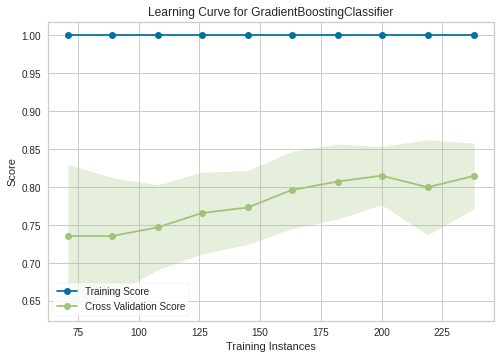

In [59]:
#Learning Curve
plot_model(estimator = tuned_gbc, plot = 'learning')

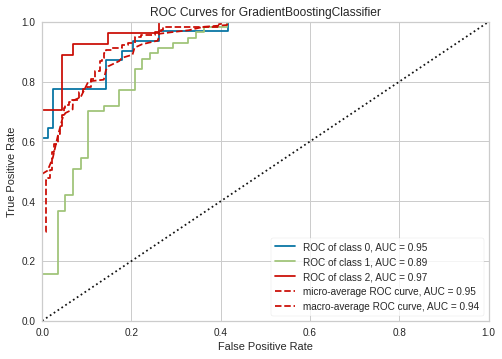

In [60]:
# AUC Curve
plot_model(estimator = tuned_gbc, plot = 'auc')


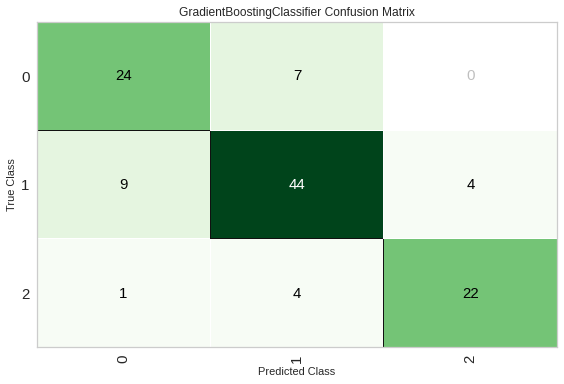

In [61]:
#Confusion Matrix
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

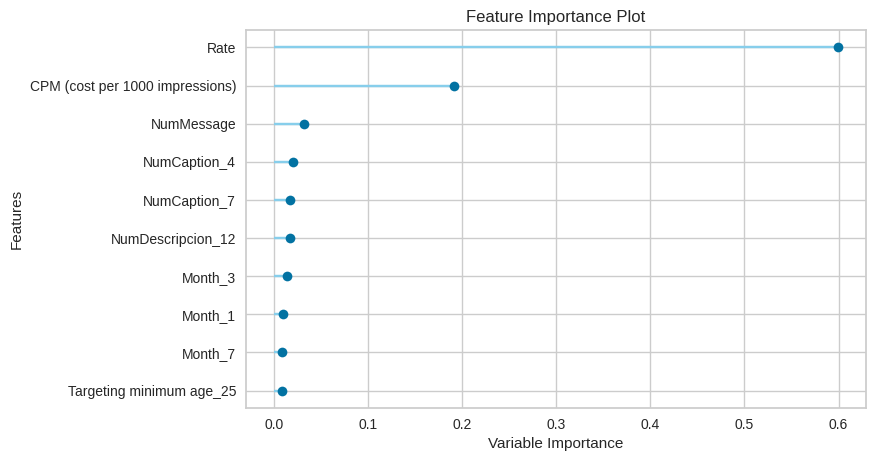

In [62]:
#Feature Importance

plot_model(estimator = tuned_gbc, plot = 'feature')

## 3.0.1- Pycaret: Mejor modelo 2: lightgbm 

In [63]:
# Mejor modelo 
lightgbm_model  = create_model('lightgbm')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.9460,0.8095,0.7963,0.7761,0.6516,0.6617
1,0.7407,0.8964,0.7143,0.7414,0.7341,0.5695,0.5736
2,0.8889,0.9073,0.9071,0.8940,0.8899,0.8258,0.8276
3,0.8148,0.9151,0.7500,0.8663,0.8059,0.6853,0.7225
4,0.7407,0.8585,0.7106,0.7631,0.7409,0.5743,0.5845
5,0.8077,0.9596,0.7759,0.8365,0.8019,0.6782,0.6953
6,0.8077,0.9207,0.8419,0.8298,0.8074,0.7059,0.7176
7,0.8846,0.9330,0.8712,0.8901,0.8853,0.8125,0.8146
8,0.8462,0.9223,0.8156,0.8615,0.8440,0.7451,0.7532
9,0.8077,0.9292,0.8120,0.8107,0.8034,0.6956,0.7005


https://github.com/pycaret/pycaret/issues/516

In [64]:
# Ajuste
tuned_lightgbm = tune_model(lightgbm_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7407,0.8993,0.7302,0.7464,0.7371,0.5724,0.5764
1,0.8148,0.8963,0.7857,0.8387,0.8041,0.6918,0.7036
2,0.8519,0.8986,0.8355,0.8614,0.8518,0.7589,0.7645
3,0.7407,0.8678,0.6688,0.7972,0.7209,0.5574,0.5915
4,0.8148,0.8958,0.7619,0.8663,0.8084,0.6875,0.7242
5,0.7692,0.9487,0.7424,0.7756,0.7678,0.6186,0.6236
6,0.8077,0.9442,0.7900,0.8159,0.8098,0.6875,0.6893
7,0.8077,0.9058,0.8199,0.8301,0.8134,0.6977,0.7026
8,0.7308,0.9299,0.7009,0.7764,0.7075,0.5583,0.5774
9,0.8462,0.9203,0.8455,0.8462,0.8462,0.7536,0.7536


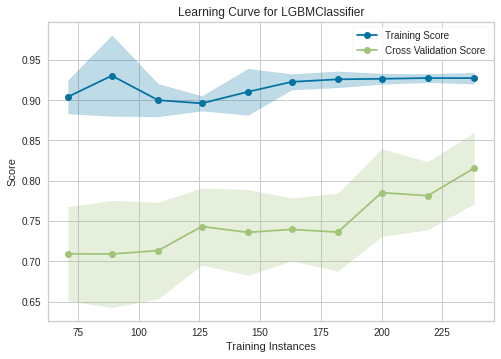

In [65]:
#Learning Curve
plot_model(estimator = tuned_lightgbm, plot = 'learning')


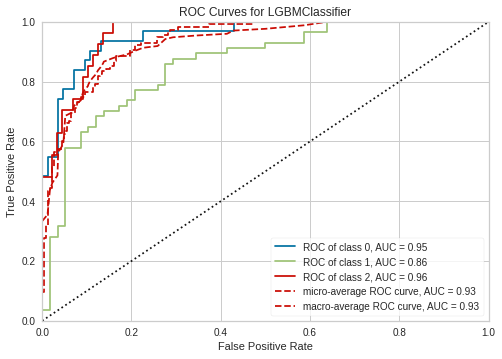

In [66]:
# AUC Curve
plot_model(estimator = tuned_lightgbm, plot = 'auc')



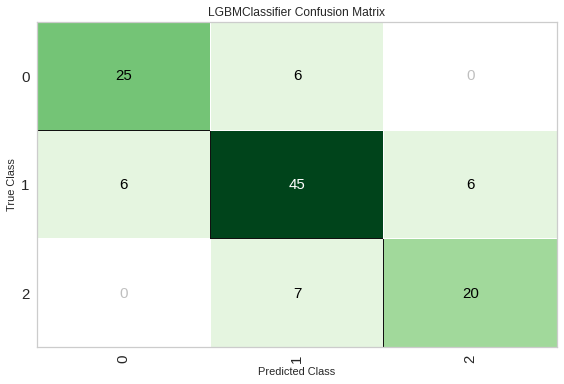

In [67]:
#Confusion Matrix
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')


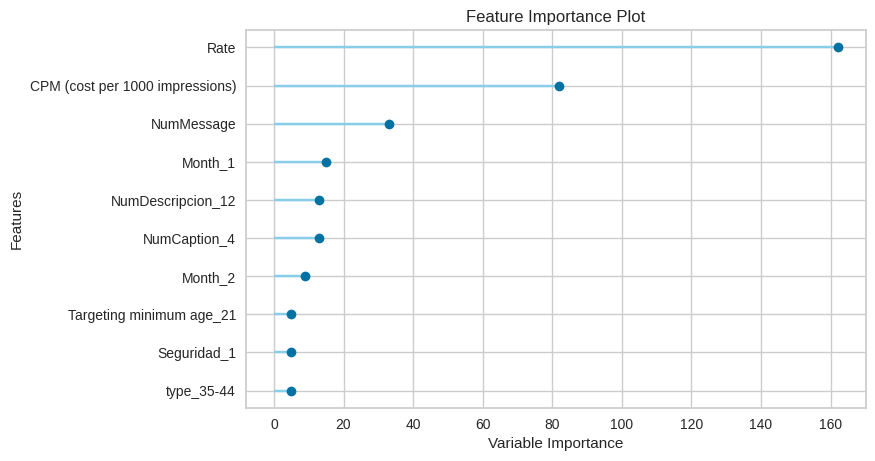

In [68]:
#Feature Importance

plot_model(estimator = tuned_lightgbm, plot = 'feature')


In [69]:
#Evaluar
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

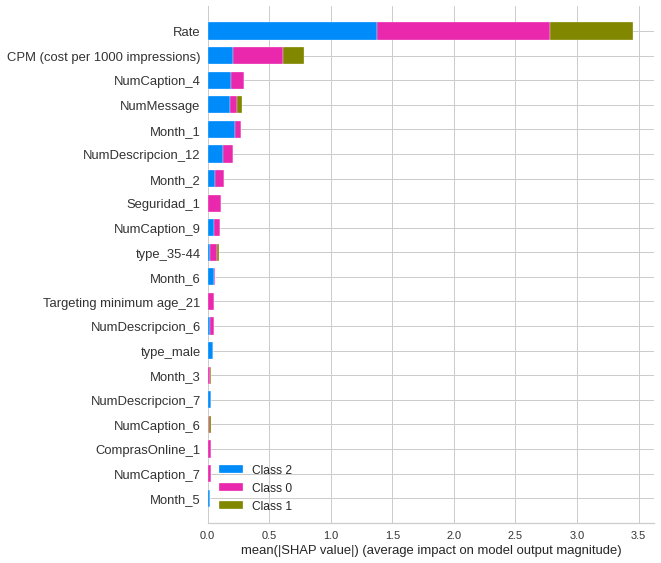

In [70]:
#Interpretation
import shap

interpret_model(tuned_lightgbm)
#This function only supports tree based models for binary classification: dt, lightgbm, et, rf.

In [71]:
#Predecir
predict_model(tuned_lightgbm, data=test)


,Month,Targeting minimum age,Targeting maximum age,CPM (cost per 1000 impressions),Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,2.35,2,12,30,7,0.004464,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.6808
1192,3,21,65,2.73,1,12,30,7,0.003020,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.6842
1852,5,21,65,2.60,1,12,30,7,0.001838,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.8115
2102,6,21,65,2.60,0,12,30,7,0.001016,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.6582
632,2,21,65,1.22,2,5,39,4,0.001414,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.8600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,4,23,44,2.47,1,12,30,7,0.001864,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0.7402
2569,7,23,44,0.93,0,7,22,6,0.000381,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0.8740
2826,7,23,55,1.26,0,7,22,6,0.000749,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.6826
2390,6,25,65,7.22,2,6,23,4,0.017857,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,2,0.9124


In [72]:
predictions = predict_model(tuned_lightgbm, data=test)
predictions.head()

,Month,Targeting minimum age,Targeting maximum age,CPM (cost per 1000 impressions),Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,2.35,2,12,30,7,0.004464,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.6808
1192,3,21,65,2.73,1,12,30,7,0.003020,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.6842
1852,5,21,65,2.60,1,12,30,7,0.001838,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.8115
2102,6,21,65,2.60,0,12,30,7,0.001016,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.6582
632,2,21,65,1.22,2,5,39,4,0.001414,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.8600


In [73]:
## 3.0.1- Pycaret: Mejor modelo 2: lightgbm 

## 3.0.1- Pycaret: Mejor modelo 3: Decision Tree 

In [74]:
# Mejor modelo 
dt_model  = create_model('dt')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7259,0.6746,0.6861,0.6721,0.4683,0.4714
1,0.7778,0.8096,0.7698,0.8025,0.7796,0.6368,0.6426
2,0.9630,0.9737,0.9744,0.9671,0.9633,0.9419,0.9440
3,0.6296,0.6786,0.5759,0.6684,0.6297,0.3836,0.3966
4,0.7778,0.8071,0.7582,0.7827,0.7734,0.6400,0.6462
5,0.8462,0.8852,0.8455,0.8539,0.8483,0.7576,0.7594
6,0.7692,0.7948,0.7344,0.7705,0.7621,0.6176,0.6244
7,0.6538,0.7454,0.7173,0.6923,0.6453,0.4868,0.5106
8,0.7692,0.7962,0.7424,0.7897,0.7711,0.6195,0.6261
9,0.8846,0.9102,0.8932,0.8862,0.8836,0.8178,0.8197


In [75]:
# Ajuste
tuned_dt = tune_model(dt_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.8449,0.8333,0.8215,0.8124,0.7046,0.7093
1,0.7407,0.8697,0.7381,0.7861,0.7339,0.5819,0.5992
2,0.8519,0.8910,0.8515,0.8519,0.8519,0.7652,0.7652
3,0.8148,0.8621,0.7959,0.8228,0.8170,0.7033,0.7049
4,0.7778,0.8299,0.7802,0.7778,0.7778,0.6494,0.6494
5,0.7692,0.8640,0.6984,0.8421,0.7524,0.5938,0.6517
6,0.8462,0.9230,0.8156,0.8615,0.8440,0.7451,0.7532
7,0.8462,0.9172,0.8455,0.8571,0.8491,0.7541,0.7559
8,0.7692,0.8687,0.7643,0.7712,0.7678,0.6295,0.6310
9,0.8077,0.8737,0.8120,0.8107,0.8034,0.6956,0.7005


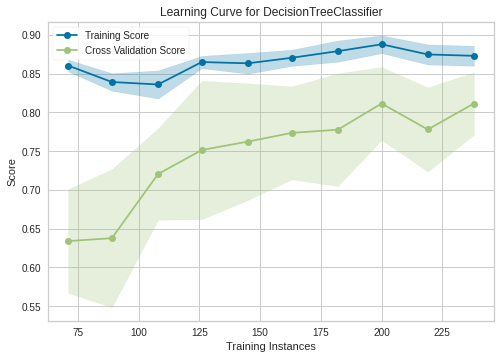

In [76]:
#Learning Curve
plot_model(estimator = tuned_dt, plot = 'learning')


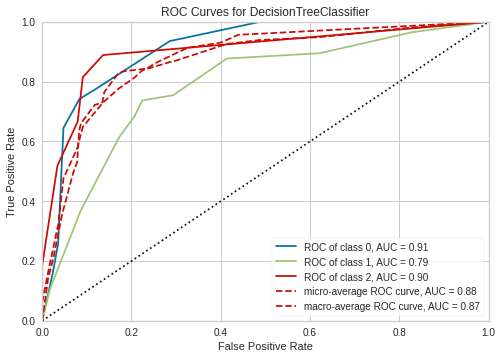

In [77]:
# AUC Curve
plot_model(estimator = tuned_dt, plot = 'auc')


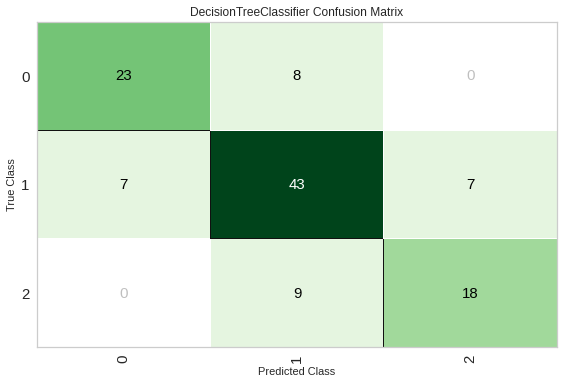

In [78]:
#Confusion Matrix
plot_model(estimator = tuned_dt, plot = 'confusion_matrix')


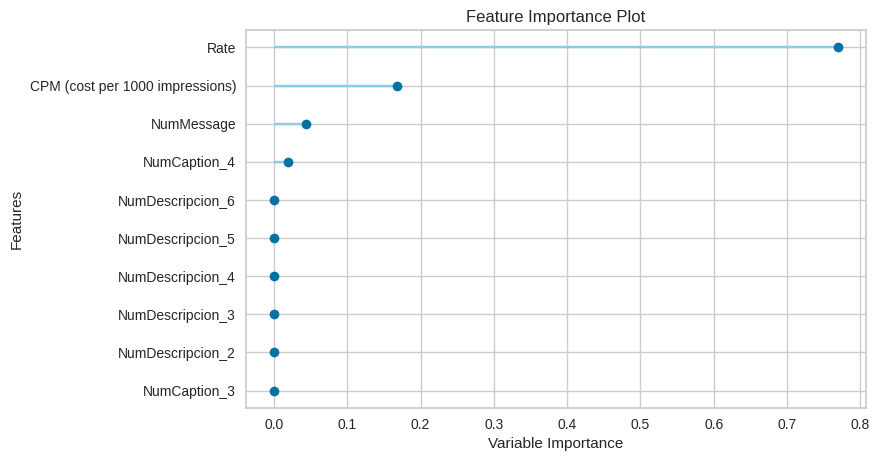

In [79]:
#Feature Importance

plot_model(estimator = tuned_dt, plot = 'feature')

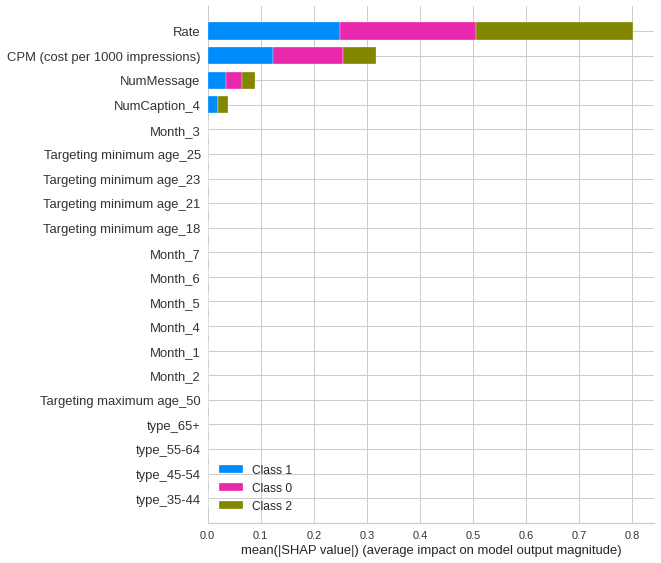

In [83]:
#Interpretation
import shap

interpret_model(tuned_dt)
#This function only supports tree based models for binary classification: dt, lightgbm, et, rf.

In [84]:
#Predecir
predict_model(tuned_dt, data=test)


,Month,Targeting minimum age,Targeting maximum age,CPM (cost per 1000 impressions),Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,2.35,2,12,30,7,0.004464,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.9556
1192,3,21,65,2.73,1,12,30,7,0.003020,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.8667
1852,5,21,65,2.60,1,12,30,7,0.001838,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.9459
2102,6,21,65,2.60,0,12,30,7,0.001016,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.8519
632,2,21,65,1.22,2,5,39,4,0.001414,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.5385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,4,23,44,2.47,1,12,30,7,0.001864,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0.9459
2569,7,23,44,0.93,0,7,22,6,0.000381,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,1.0000
2826,7,23,55,1.26,0,7,22,6,0.000749,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.5556
2390,6,25,65,7.22,2,6,23,4,0.017857,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,2,0.9556


In [85]:
predictions = predict_model(tuned_dt, data=test)
predictions.head()

,Month,Targeting minimum age,Targeting maximum age,CPM (cost per 1000 impressions),Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,2.35,2,12,30,7,0.004464,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.9556
1192,3,21,65,2.73,1,12,30,7,0.003020,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.8667
1852,5,21,65,2.60,1,12,30,7,0.001838,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.9459
2102,6,21,65,2.60,0,12,30,7,0.001016,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.8519
632,2,21,65,1.22,2,5,39,4,0.001414,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.5385


## 3.1.- Librerias a usar

In [ ]:
!pip install kneed

In [88]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd 
import random
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import datetime
import seaborn as sns
import math 
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
import plotly.graph_objs as go
import plotly as py
import plotly.express as px
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objs as pgo
import sklearn.model_selection as model_selection
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as model_selection 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [89]:
!pip install sklearn-pandas
from sklearn_pandas import DataFrameMapper

In [90]:
print(x_train.columns)
x_train_cp = x_train.drop(['Unique leads','Impressions', 'Reach', 'Link clicks','Cost','CTR','Cost per on-Facebook lead'],axis=1 )
x_test_cp = x_test.drop(['Unique leads','Impressions', 'Reach', 'Link clicks','Cost','CTR','Cost per on-Facebook lead'],axis=1 )
print(x_train_cp.columns)
print(x_test_cp.columns)


print(y_train.shape)
print(y_test.shape)

Index(['Month', 'Targeting minimum age', 'Targeting maximum age', 'Cost',
       'Impressions', 'Reach', 'Link clicks', 'Unique leads',
       'CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead',
       'NumDescripcion', 'NumMessage', 'NumCaption', 'Rate', 'CTR',
       'ComprasOnline', 'Seguridad', 'SeguridadAlarmas',
       'DispositivoInteligente', 'DispositivosGPS', 'SmartTechnologies',
       'TarjetasCredito', 'Transporte', 'Vehiculos', 'type_female',
       'type_male', 'type_18-24', 'type_25-34', 'type_35-44', 'type_45-54',
       'type_55-64', 'type_65+'],
      dtype='object')
Index(['Month', 'Targeting minimum age', 'Targeting maximum age',
       'CPM (cost per 1000 impressions)', 'NumDescripcion', 'NumMessage',
       'NumCaption', 'Rate', 'ComprasOnline', 'Seguridad', 'SeguridadAlarmas',
       'DispositivoInteligente', 'DispositivosGPS', 'SmartTechnologies',
       'TarjetasCredito', 'Transporte', 'Vehiculos', 'type_female',
       'type_male', 'type_18-24', '

In [91]:
print(type(x_train_cp))
print(x_train_cp)

#X = data_original.drop('Clasificacion', axis=1)

<class 'pandas.core.frame.DataFrame'>
         Month  Targeting minimum age  ...  type_55-64  type_65+
1351  0.500000               0.714286  ...         0.0       0.0
882   0.333333               0.714286  ...         0.0       0.0
1683  0.666667               0.714286  ...         0.0       0.0
321   0.000000               0.428571  ...         0.0       0.0
1288  0.500000               0.714286  ...         0.0       0.0
...        ...                    ...  ...         ...       ...
1909  0.833333               0.714286  ...         0.0       0.0
1341  0.500000               0.714286  ...         0.0       0.0
811   0.166667               1.000000  ...         0.0       0.0
223   0.000000               0.428571  ...         0.0       0.0
1280  0.500000               0.714286  ...         0.0       0.0

[380 rows x 25 columns]


In [92]:
print(type(x_test_cp))
print(x_test_cp)

<class 'pandas.core.frame.DataFrame'>
         Month  Targeting minimum age  ...  type_55-64  type_65+
1518  0.500000               0.428571  ...         0.0       0.0
1192  0.333333               0.428571  ...         0.0       0.0
1852  0.666667               0.428571  ...         0.0       0.0
2102  0.833333               0.428571  ...         0.0       0.0
632   0.166667               0.428571  ...         0.0       0.0
...        ...                    ...  ...         ...       ...
1337  0.500000               0.714286  ...         0.0       0.0
2569  1.000000               0.714286  ...         0.0       0.0
2826  1.000000               0.714286  ...         0.0       0.0
2390  0.833333               1.000000  ...         0.0       0.0
1819  0.666667               0.428571  ...         0.0       0.0

[96 rows x 25 columns]


In [93]:
# para guardar el accuracie
accuracies = {}

## 3.1.- Logistic regression multinomial



In [94]:
# define the multinomial logistic regression model
model_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
model_lg.fit(x_train_cp, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
# get modelo


acc = model_lg.score(x_test_cp,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 52.08%


In [97]:
# get importance
importances = model_lg.coef_[0]

In [98]:
# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.05 ].head(20)

,feature,importance
0,Month,1.542164
4,NumDescripcion,0.845581
6,NumCaption,0.747447
2,Targeting maximum age,0.672207
9,Seguridad,0.647068
21,type_35-44,0.404373
18,type_male,0.283229
13,SmartTechnologies,0.248534
15,Transporte,0.248534
11,DispositivoInteligente,0.248534


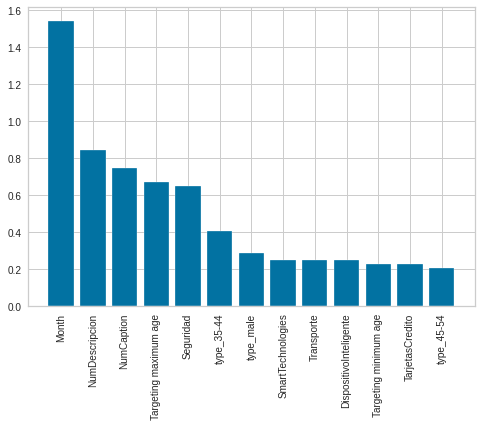

In [99]:
plt.bar(df_imp[df_imp.importance >= 0.05 ].feature,df_imp[df_imp.importance >= 0.05 ].importance)
plt.xticks(rotation=90)
plt.show()


In [100]:
model_lg.score(x_test_cp,y_test)

0.5208333333333334

In [101]:
print( classification_report(y_test, model_lg.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.53      0.31      0.39        26
           1       0.54      0.70      0.61        50
           2       0.44      0.35      0.39        20

    accuracy                           0.52        96
   macro avg       0.50      0.45      0.46        96
weighted avg       0.52      0.52      0.50        96



Plot of a ROC

*******FIN VERSION ANTERIOR REGRESION LOGISTICA

In [102]:
#lr.feature_importances
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


## 3.2.- Elastic Net

In [103]:

enet = LogisticRegression(penalty= 'elasticnet', solver= 'saga', max_iter=500,l1_ratio=0.1)
enet.fit(x_train_cp, y_train)
acc = enet.score(x_test_cp,y_test)*100
accuracies['enet'] = acc
print("Test Accuracy of Elastic net Algorithm: {:.2f}%".format(acc))

Test Accuracy of Elastic net Algorithm: 53.12%


In [104]:
# get importance
importances = enet.coef_[0]



In [105]:
# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.05 ].head(10)


,feature,importance
0,Month,1.579514
4,NumDescripcion,0.875874
6,NumCaption,0.704850
2,Targeting maximum age,0.668449
9,Seguridad,0.664562
21,type_35-44,0.405657
18,type_male,0.238098
13,SmartTechnologies,0.195327
15,Transporte,0.195327
11,DispositivoInteligente,0.195327


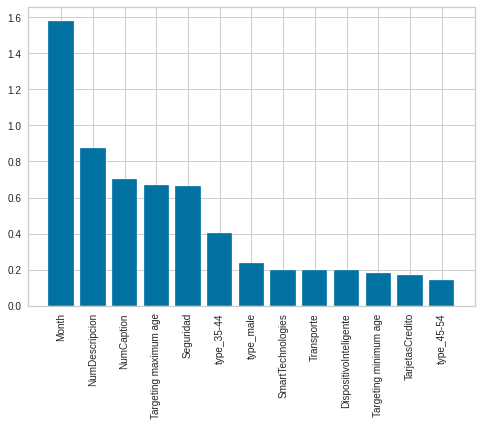

In [106]:
# plot feature importance
plt.bar(df_imp[df_imp.importance >= 0.05 ].feature,df_imp[df_imp.importance >= 0.05 ].importance)
plt.xticks(rotation=90)
plt.show()

In [107]:
print( classification_report(y_test, enet.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.53      0.31      0.39        26
           1       0.55      0.72      0.62        50
           2       0.47      0.35      0.40        20

    accuracy                           0.53        96
   macro avg       0.52      0.46      0.47        96
weighted avg       0.53      0.53      0.51        96



## 3.1.- Logistic regression multinomial con Tunning Hyperparámetros

In [108]:
# define the multinomial logistic regression model
model_tunlg = LogisticRegression(multi_class='multinomial')
model_tunlg

#‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
# crear espacio de busqueda para 
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

solver = ['newton-cg','sag','saga','lbfgs']

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

In [110]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(model_tunlg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [111]:
# Fit randomized search
best_model_lg = clf.fit(x_train_cp, y_train)

In [112]:
# View best hyperparameters
print('Best Penalty:', best_model_lg.best_estimator_.get_params()['penalty'])
print('Best C:', best_model_lg.best_estimator_.get_params()['C'])
print('Best solver:', best_model_lg.best_estimator_.get_params()['solver'])

Best Penalty: l2
Best C: 0.40933771531130336
Best solver: sag


In [113]:
# Predict target vector
best_model_lg.predict(x_test_cp)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

In [114]:
acc = best_model_lg.score(x_test_cp,y_test)*100
accuracies['best_model_lg'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 51.04%


In [115]:
# get importance
importances = best_model_lg.best_estimator_.coef_[0]

In [116]:
# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.05 ].head(30)


,feature,importance
0,Month,1.203185
6,NumCaption,0.694391
4,NumDescripcion,0.655106
2,Targeting maximum age,0.409431
9,Seguridad,0.386730
21,type_35-44,0.341721
18,type_male,0.250762
14,TarjetasCredito,0.183258
13,SmartTechnologies,0.165198
15,Transporte,0.165198


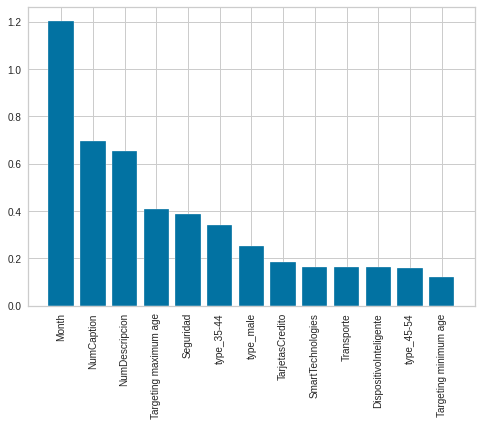

In [117]:
# plot feature importance
plt.bar(df_imp[df_imp.importance >= 0.05 ].feature,df_imp[df_imp.importance >= 0.05 ].importance)
plt.xticks(rotation=90)
plt.show()

In [118]:
print( classification_report(y_test, best_model_lg.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.45      0.19      0.27        26
           1       0.53      0.74      0.62        50
           2       0.47      0.35      0.40        20

    accuracy                           0.51        96
   macro avg       0.48      0.43      0.43        96
weighted avg       0.50      0.51      0.48        96



## 3.3.- Support Vector Machine (SVM) Algorithm


https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

In [119]:
# crear espacio de busqueda para 
# Create regularization penalty space
kernel = ['linear', 'poly', 'rbf' ,'sigmoid' 'precomputed']
# Create regularization hyperparameter distribution using uniform distribution
C = [1, 10, 100]


# Create hyperparameter options
hyperparameters = dict(C=C, kernel=kernel)

In [120]:
svm = SVC( gamma='scale',decision_function_shape='ovr')

In [121]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(svm, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [122]:
# Fit randomized search
best_model_svm = clf.fit(x_train_cp, y_train)

In [123]:
# View best hyperparameters
print('Best kernel:', best_model_svm.best_estimator_.get_params()['kernel'])
print('Best C:', best_model_svm.best_estimator_.get_params()['C'])


Best kernel: linear
Best C: 100


In [124]:
acc = best_model_svm.score(x_test_cp,y_test)*100
accuracies['svm'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 59.38%


In [125]:
# get importance
importances = best_model_svm.best_estimator_.coef_[0]

# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.05 ].head(30)

,feature,importance
5,NumMessage,1.738733
9,Seguridad,1.489060
0,Month,0.860868
4,NumDescripcion,0.826332
1,Targeting minimum age,0.702113
2,Targeting maximum age,0.652768
6,NumCaption,0.525127
16,Vehiculos,0.397993
14,TarjetasCredito,0.349766
3,CPM (cost per 1000 impressions),0.315386


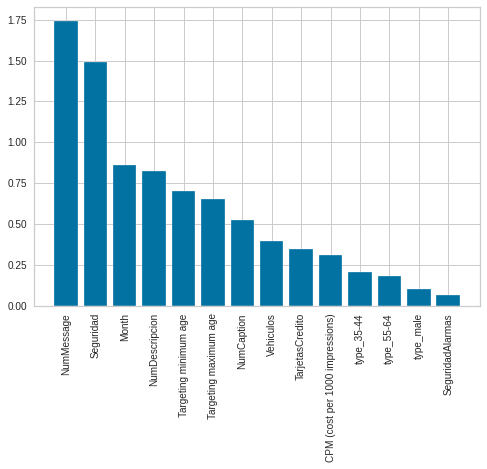

In [126]:
# plot feature importance
plt.bar(df_imp[df_imp.importance >= 0.05 ].feature,df_imp[df_imp.importance >= 0.05 ].importance)
plt.xticks(rotation=90)
plt.show()

In [127]:
print( classification_report(y_test, best_model_svm.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.33      0.08      0.12        26
           1       0.57      0.94      0.71        50
           2       1.00      0.40      0.57        20

    accuracy                           0.59        96
   macro avg       0.64      0.47      0.47        96
weighted avg       0.60      0.59      0.52        96



Plot of a ROC

## 3.4- KNN

In [128]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [129]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  # n_neighbors means k


In [130]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [131]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(knn, hyperparameters, random_state=1, n_iter=100, cv=10, verbose=0, n_jobs=-1)

In [132]:
# Fit randomized search
best_model_knn = clf.fit(x_train_cp, y_train)

In [133]:
# View best hyperparameters
print('Best leaf_size:', best_model_knn.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', best_model_knn.best_estimator_.get_params()['p'])


Best leaf_size: 35
Best n_neighbors: 11
Best p: 2


In [134]:
acc = best_model_knn.score(x_test_cp,y_test)*100
accuracies['svm'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 40.62%


In [135]:
# No hay features importances en KNN


In [136]:
print( classification_report(y_test, best_model_knn.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.25      0.23      0.24        26
           1       0.47      0.60      0.53        50
           2       0.38      0.15      0.21        20

    accuracy                           0.41        96
   macro avg       0.36      0.33      0.33        96
weighted avg       0.39      0.41      0.38        96



## 3.4- Naive Bayes

In [137]:
hyperparameters = {'var_smoothing': np.logspace(0,-9, num=100)}

In [138]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


In [139]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(nb, hyperparameters, random_state=1, n_iter=100, cv=10, verbose=0, n_jobs=-1)

In [140]:
# Fit randomized search
best_model_nb = clf.fit(x_train_cp, y_train)

In [141]:
# View best hyperparameters
print('Best var_smoothing:', best_model_nb.best_estimator_.get_params()['var_smoothing'])


Best var_smoothing: 2.310129700083158e-06


In [142]:
acc = best_model_nb.score(x_test_cp,y_test)*100
accuracies['nb'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 66.67%


In [143]:
print( classification_report(y_test, best_model_nb.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        26
           1       0.66      0.80      0.72        50
           2       0.58      0.35      0.44        20

    accuracy                           0.67        96
   macro avg       0.66      0.60      0.62        96
weighted avg       0.66      0.67      0.65        96



## 3.5.- Decision Tree Algorithm



In [144]:

from matplotlib import pyplot
dtc = DecisionTreeClassifier(max_depth=3)


In [145]:
# Create randomized search 5-fold cross validation and 100 iterations
#clf = RandomizedSearchCV(dtc, hyperparameters, random_state=1, n_iter=100, cv=10, verbose=0, n_jobs=-1)

In [146]:
best_model_tree = dtc.fit(x_train_cp, y_train)



acc = best_model_tree.score(x_test_cp,y_test)*100
accuracies['tree'] = acc
print("Test Accuracy of Tree Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Tree Tunned Algorithm: 70.83%


[Text(223.2, 261.6075, 'X[7] <= 0.007\ngini = 0.626\nsamples = 380\nvalue = [92, 189, 99]'),
 Text(111.6, 186.8625, 'X[7] <= 0.002\ngini = 0.509\nsamples = 259\nvalue = [92, 156, 11]'),
 Text(55.8, 112.1175, 'X[3] <= 0.021\ngini = 0.433\nsamples = 63\nvalue = [43, 20, 0]'),
 Text(27.9, 37.3725, 'gini = 0.42\nsamples = 20\nvalue = [6, 14, 0]'),
 Text(83.69999999999999, 37.3725, 'gini = 0.24\nsamples = 43\nvalue = [37, 6, 0]'),
 Text(167.39999999999998, 112.1175, 'X[3] <= 0.076\ngini = 0.453\nsamples = 196\nvalue = [49, 136, 11]'),
 Text(139.5, 37.3725, 'gini = 0.335\nsamples = 152\nvalue = [19, 122, 11]'),
 Text(195.29999999999998, 37.3725, 'gini = 0.434\nsamples = 44\nvalue = [30, 14, 0]'),
 Text(334.79999999999995, 186.8625, 'X[6] <= 0.562\ngini = 0.397\nsamples = 121\nvalue = [0, 33, 88]'),
 Text(279.0, 112.1175, 'X[3] <= 0.094\ngini = 0.148\nsamples = 62\nvalue = [0, 5, 57]'),
 Text(251.1, 37.3725, 'gini = 0.0\nsamples = 46\nvalue = [0, 0, 46]'),
 Text(306.9, 37.3725, 'gini = 0.43\n

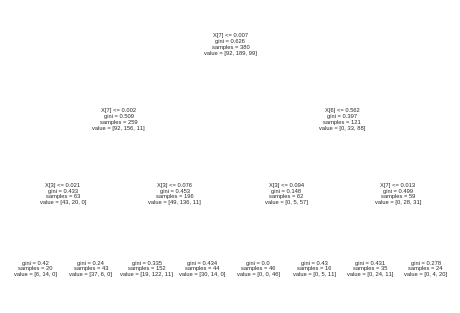

In [147]:
from sklearn import tree

tree.plot_tree(best_model_tree.fit(x_train_cp, y_train)) 

In [148]:
print( classification_report(y_test, best_model_tree.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.79      0.58      0.67        26
           1       0.68      0.84      0.75        50
           2       0.73      0.55      0.63        20

    accuracy                           0.71        96
   macro avg       0.73      0.66      0.68        96
weighted avg       0.72      0.71      0.70        96



### Gini

In [149]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train_cp, y_train)
acc = clf_gini.score(x_test_cp, y_test)*100
accuracies['Decision Tree gini'] = acc
print("Decision Tree Gini Test Accuracy {:.2f}%".format(acc))

#Compare the train-set and test-set accuracy

y_pred_gini = clf_gini.predict(x_test_cp)
y_pred_train_gini = clf_gini.predict(x_train_cp)
y_pred_train_gini

#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train_cp, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test_cp, y_test)))


Decision Tree Gini Test Accuracy 70.83%
Training set score: 0.8000
Test set score: 0.7083


[Text(223.2, 261.6075, 'X[7] <= 0.007\ngini = 0.626\nsamples = 380\nvalue = [92, 189, 99]'),
 Text(111.6, 186.8625, 'X[7] <= 0.002\ngini = 0.509\nsamples = 259\nvalue = [92, 156, 11]'),
 Text(55.8, 112.1175, 'X[3] <= 0.021\ngini = 0.433\nsamples = 63\nvalue = [43, 20, 0]'),
 Text(27.9, 37.3725, 'gini = 0.42\nsamples = 20\nvalue = [6, 14, 0]'),
 Text(83.69999999999999, 37.3725, 'gini = 0.24\nsamples = 43\nvalue = [37, 6, 0]'),
 Text(167.39999999999998, 112.1175, 'X[3] <= 0.076\ngini = 0.453\nsamples = 196\nvalue = [49, 136, 11]'),
 Text(139.5, 37.3725, 'gini = 0.335\nsamples = 152\nvalue = [19, 122, 11]'),
 Text(195.29999999999998, 37.3725, 'gini = 0.434\nsamples = 44\nvalue = [30, 14, 0]'),
 Text(334.79999999999995, 186.8625, 'X[6] <= 0.562\ngini = 0.397\nsamples = 121\nvalue = [0, 33, 88]'),
 Text(279.0, 112.1175, 'X[3] <= 0.094\ngini = 0.148\nsamples = 62\nvalue = [0, 5, 57]'),
 Text(251.1, 37.3725, 'gini = 0.0\nsamples = 46\nvalue = [0, 0, 46]'),
 Text(306.9, 37.3725, 'gini = 0.43\n

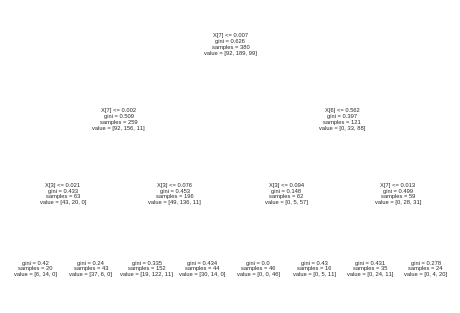

In [150]:
# Visualize decision-trees


from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train_cp, y_train)) 

### Entropy

In [151]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train_cp, y_train)

#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(x_test_cp)

#Check accuracy score with criterion entropy
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(x_train_cp)

y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_en.score(x_train_cp, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test_cp, y_test)))

Model accuracy score with criterion entropy: 0.7604
Training-set accuracy score: 0.7816
Training set score: 0.7816
Test set score: 0.7604


[Text(386.3076923076923, 380.52, 'X[7] <= 0.006\nentropy = 1.502\nsamples = 380\nvalue = [92, 189, 99]'),
 Text(206.03076923076924, 271.8, 'X[7] <= 0.003\nentropy = 1.122\nsamples = 245\nvalue = [92, 146, 7]'),
 Text(103.01538461538462, 163.07999999999998, 'X[3] <= 0.044\nentropy = 0.996\nsamples = 132\nvalue = [71, 61, 0]'),
 Text(51.50769230769231, 54.360000000000014, 'entropy = 0.953\nsamples = 91\nvalue = [34, 57, 0]'),
 Text(154.52307692307693, 54.360000000000014, 'entropy = 0.461\nsamples = 41\nvalue = [37, 4, 0]'),
 Text(309.04615384615386, 163.07999999999998, 'X[3] <= 0.076\nentropy = 1.009\nsamples = 113\nvalue = [21, 85, 7]'),
 Text(257.53846153846155, 54.360000000000014, 'entropy = 0.667\nsamples = 87\nvalue = [4, 76, 7]'),
 Text(360.55384615384617, 54.360000000000014, 'entropy = 0.931\nsamples = 26\nvalue = [17, 9, 0]'),
 Text(566.5846153846154, 271.8, 'X[7] <= 0.017\nentropy = 0.903\nsamples = 135\nvalue = [0, 43, 92]'),
 Text(515.0769230769231, 163.07999999999998, 'X[3] <

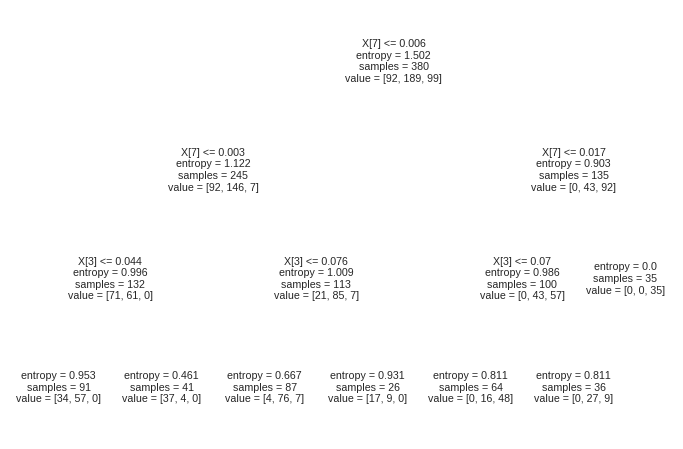

In [152]:
#Visualize decision-trees

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train_cp, y_train)) 

Bibliografia
https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

## 3.6.-Random Forest Classification

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [167]:
from sklearn.feature_selection import RFECV

In [153]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [154]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               


In [168]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

best_model_rf = RFECV(clf, step=1)


In [169]:
# Fit randomized search
best_model_rf = clf.fit(x_train_cp, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 24.3min finished


In [157]:
# Fit randomized search
best_model_rf = clf.fit(x_train_cp, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 24.4min finished


In [171]:
acc = best_model_rf.score(x_test_cp,y_test)*100
accuracies['rf'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 73.96%


In [172]:
#los mejores parametros
best_model_rf.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

Para sacar los features (característias) importantes

https://github.com/scikit-learn/scikit-learn/issues/4945

In [176]:
# get importance
importances = best_model_rf.best_estimator_.feature_importances_

# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.01 ].head(30)

,feature,importance
7,Rate,0.461230
3,CPM (cost per 1000 impressions),0.137236
0,Month,0.074323
5,NumMessage,0.060855
6,NumCaption,0.048993
4,NumDescripcion,0.038856
21,type_35-44,0.018486
19,type_18-24,0.016226
20,type_25-34,0.014069
18,type_male,0.013338


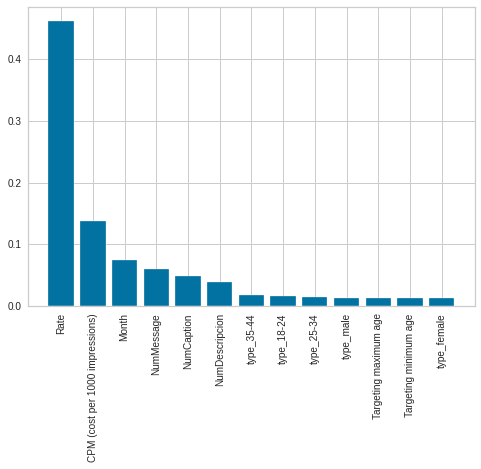

In [178]:
# plot feature importance
plt.bar(df_imp[df_imp.importance >= 0.01 ].feature,df_imp[df_imp.importance >= 0.01 ].importance)
plt.xticks(rotation=90)
plt.show()

## 3.7.-Keras

In [ ]:
import tensorflow as tf
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(x_train.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_model = build_model()


In [ ]:
neural_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 184       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Keeping EPOCHs high as dataset is small.
EPOCHS = 100
neural_pred = neural_model.fit(x_train, y_train,epochs=EPOCHS, validation_split=0.1, verbose=2)

Epoch 1/100
11/11 - 1s - loss: 0.6827 - accuracy: 0.4123 - val_loss: 0.6316 - val_accuracy: 0.5000
Epoch 2/100
11/11 - 0s - loss: 0.6167 - accuracy: 0.4971 - val_loss: 0.5732 - val_accuracy: 0.5000
Epoch 3/100
11/11 - 0s - loss: 0.5676 - accuracy: 0.4971 - val_loss: 0.5203 - val_accuracy: 0.5000
Epoch 4/100
11/11 - 0s - loss: 0.5218 - accuracy: 0.4971 - val_loss: 0.4724 - val_accuracy: 0.5000
Epoch 5/100
11/11 - 0s - loss: 0.4818 - accuracy: 0.4971 - val_loss: 0.4273 - val_accuracy: 0.5000
Epoch 6/100
11/11 - 0s - loss: 0.4452 - accuracy: 0.4971 - val_loss: 0.3857 - val_accuracy: 0.5000
Epoch 7/100
11/11 - 0s - loss: 0.4133 - accuracy: 0.4971 - val_loss: 0.3458 - val_accuracy: 0.5000
Epoch 8/100
11/11 - 0s - loss: 0.3811 - accuracy: 0.4971 - val_loss: 0.3113 - val_accuracy: 0.5000
Epoch 9/100
11/11 - 0s - loss: 0.3538 - accuracy: 0.4971 - val_loss: 0.2791 - val_accuracy: 0.5000
Epoch 10/100
11/11 - 0s - loss: 0.3275 - accuracy: 0.4971 - val_loss: 0.2502 - val_accuracy: 0.5000
Epoch 11/

In [ ]:
_, acc = neural_model.evaluate(x_test, y_test,
                            batch_size=64)
acc = acc *100
accuracies['Keras'] = acc
print("Keras Algorithm Accuracy Score : {:.2f}%".format(acc))

2/2 [==============================] - 0s 6ms/step - loss: 0.2703 - accuracy: 0.5208
Keras Algorithm Accuracy Score : 52.08%


Plot of a ROC

# 7.- Comparacion de modelos y eleccion del mejor

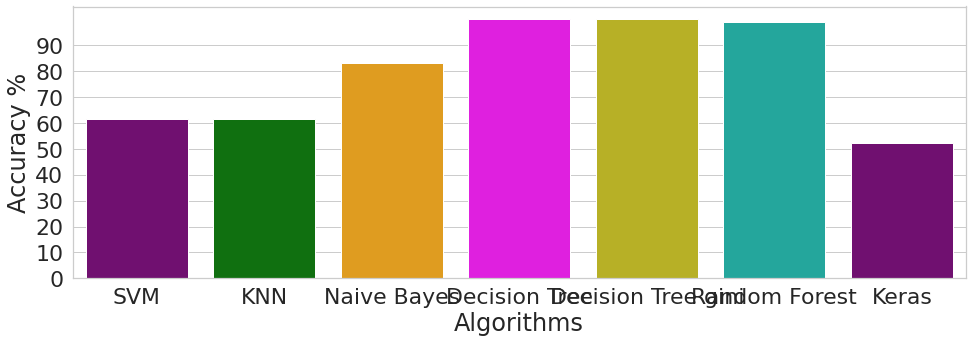

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

8.- Matrix de confusion 

In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


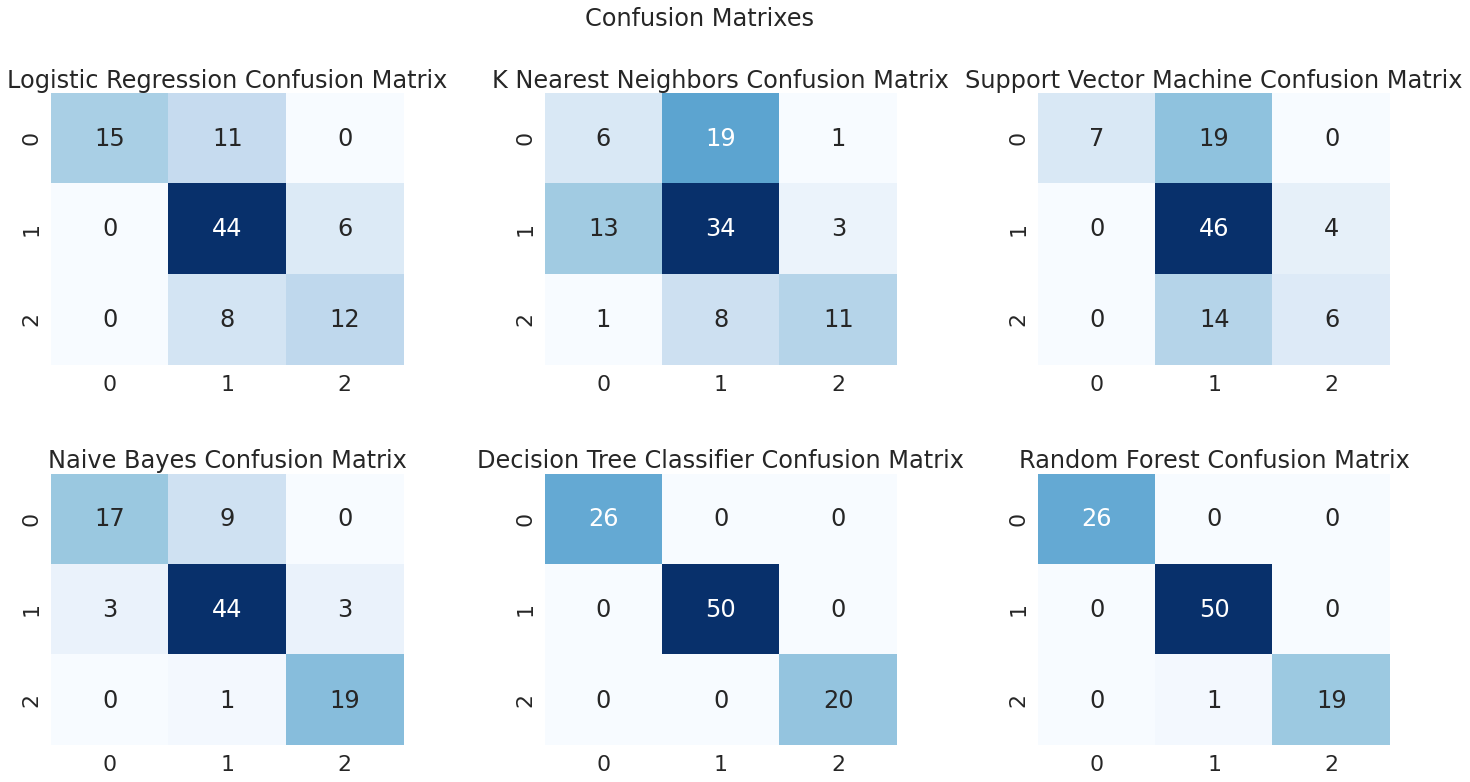

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

# 9.- Mejor modelo (Randon Forest)


## K Fold Cross Validation (Randon Forest)

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python

In [ ]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_model, x_train, y_train, cv=10, scoring = "accuracy")

In [ ]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

## Feature Importance (Randon Forest)


https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances.head(20)

,importance
feature,
Cost per on-Facebook lead,0.446
Cost,0.119
Rate,0.103
Reach,0.077
Impressions,0.070
Link clicks,0.042
Unique leads,0.029
CTR,0.027
Month,0.022


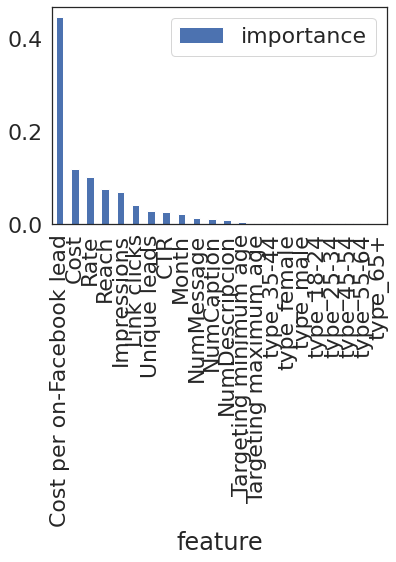

In [ ]:
importances.plot.bar()

In [ ]:
variables= ['Cost per on-Facebook lead','Targeting minimum age', 'Targeting maximum age', 'type_female', 'type_male', 'type_18-24', 'type_25-34',
       'type_35-44', 'type_45-54', 'type_55-64', 'type_65+']
x_train_t = x_train.drop(variables, axis=1)
x_test_t= x_test.drop(variables, axis=1)


In [ ]:
# Training random forest again:

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(x_train_t, y_train)
Y_prediction = random_forest.predict(x_test_t)


random_forest.score(x_train_t, y_train)


acc_random_forest = round(random_forest.score(x_train_t, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")


100.0 %


In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 98.95 %


## Hyperparameter Tuning

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train_t, y_train)
Y_prediction = random_forest.predict(x_test_t)

random_forest.score(x_train_t, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 98.16 %


## Further Evaluation

In [ ]:
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, x_train_t, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 90,   2,   0],
       [  0, 187,   2],
       [  0,   3,  96]])

In [ ]:
predictions 

In [ ]:
#Precision and Recal
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions,average=None))
print("Recall:",recall_score(y_train, predictions, average=None))

Precision: [1.         0.97395833 0.97959184]
Recall: [0.97826087 0.98941799 0.96969697]


In [ ]:
# F-Score
from sklearn.metrics import f1_score
f1_score(y_train, predictions, average=None)

array([0.98360656, 0.97894737, 0.97461929])

In [ ]:
#Precision Recall Curv
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train_t)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)